<h1><center>Modelling Montesinho Natural Park's conflagrations</center></h1> 
<h3><center>University of Cyprus - Project for MAS451</center></h3> 
<h3><center>Ifigeneia Galanou, Evi Zaou, Marios Andreou</center></h3> 

---

## Introduction

Modelling instances of conflagrations, in regards to various parameters and variables can be crucial to be able to predict what affects the probability distribution of dependent variables such as fire occurrence, burnt area and rate of spread. While controlled fires are sometimes used to maintain the balance of various forest ecosystems, like controlling the areas that carnivorous plants are prevalent, not being able to take the necessary precautions to counteract and put out ill-intent or accidental conflagrations could have cataclysmic consequences to individuals in economical and health-related ways, to the flora and fauna and to rural communities. Here is where the data from the flames that plagued Portugal's Montesinho Natural Park from January 2000 to December 2003, come in handy. The dataset gathered in this time interval, contains 517 instances and is defined by 13 columns; 1 is the dependent variable; **total burnt area** while the other 12 are the explanatory variable, where 4 of them are discrete-valued and the other 8 are continuous in nature. 

Attribute/Variable Description:
---

* $X$: the x-axis spatial coordinate within the Montesinho park map; $X\in\{1,\dots,9\}$
* $Y$: the y-axis spatial coordinate within the Montesinho park map; $Y\in\{1,\dots,9\}$
    * For these refer to map below:
    <img src=https://d3i71xaburhd42.cloudfront.net/0f529dc2b2b2bad22394454d4cba79e2c319f0b0/4-Figure2-1.png width="500">
    
    
* **Month**: the month that the fire occurred. In the current state of the data, this variable is character-valued with values from 'jan' to 'dec'. _These were translated to numerical values where_ month $\in\{1,\dots,12\}$.


* **Day**:  the day the fire occurred. In the current state of the data, this variable is character-valued with values from 'mon' to 'sun'. _These were translated to numerical values where_ day $\in\{1,\dots,7\}$.


* **Fine Fuel Moisture Code (FFMC)**: a numeric rating of the moisture content of litter and other cured fine fuels. *FFMC provides a measure of ease of fire inception and flammability of the top fuel layer, where initial ignition usually occurs.* This is a percentage so FFMC $\in[0,100]$


* **Duff Moisture Code (DMC)**: a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. _This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material._


* **Drought Code (DC)**: a numeric rating of the average moisture content of deep, compact organic layers.  _This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs._


* **Initial Spread Index (ISI)**: _a numeric rating that approximates the expected rate of fire spread._ **It is based on wind speed and FFMC.** Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI. 
    * Mathematically speaking this is approximately the derivative of the theoretical expected value of our dependent variable in this instance; $\mathbf{E}[Y|\vec{X}=\vec{x}]$, with respect to time. Indeed,
\begin{equation} \label{eq:1}
ISI\approxeq\mathbf{E}[\frac{d(Y|\vec{X}=\vec{x})}{dt}]\stackrel{\because \mathbf{E}[\cdot] \text{is linear}}{=}\frac{d(\mathbf{E}[Y|\vec{X}=\vec{x}])}{dt}
\end{equation}

* **Temperature (temp)**: the temperature in Celsius degrees


* **Relative Humidity (RH)**: the relative humidity present in air expressed as a percentage


* **wind**: wind speed in $km/h$


* **rain**: outside rain in $mm/m^2$


* **area**: the burnt area of the forest (in ha - hectares where $1ha=10000m^2$). In the current state of the data, our **dependent variable** is very skewed towards $0$.


FWI
---
---
The aforementioned indices are found in the **Canadian Forest Fire Weather Index (FWI) System, which is adopted nowadays by all governing bodies overlooking the preservation and safety of forests.** 

**The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI _(included in our dataset - affected by FFMC and Wind speed)_ and the BUI _(NOT included in our dataset - affected by DC and DMC)_, and is used as a general index of fire danger throughout the forested areas of Canada and the world.**

_**Summary**_

_The Canadian Forest Fire Weather Index (FWI) System consists of six components that account for the effects of fuel moisture and weather conditions on fire behavior._

_The first three components are fuel moisture codes, which are numeric ratings of the moisture content of the forest floor and other dead organic matter. Their values rise as the moisture content decreases. There is one fuel moisture code for each of three layers of fuel: litter and other fine fuels; loosely compacted organic layers of moderate depth; and deep, compact organic layers._

_The remaining three components are fire behavior indices, which represent the rate of fire spread, the fuel available for combustion, and the frontal fire intensity; these three values rise as the fire danger increases_

_**Structure of the FWI System**_

_The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecutive daily observations of temperature, relative humidity, wind speed, and 24-hour precipitation. The six standard components provide numeric ratings of relative potential for wildland fire._

![Structure of the FWI](fwi_structure.gif)

## Changes made to the data
---
Due to several reasons some changes were made to the dataset to make it more usable for our task at hand. Those changes, will be showcased in an interactive manner here; just like us, where through our project we discovered the necessity of these changes, we will showcase where issues with the "raw" material arose.

In [1]:
# Importing the data from the csv
data<-read.csv("forestfiresdata.csv")
names(data)[1]<-"X" # Due to poor encoding from .xlsx to .csv,
                    # there needs to be a slight renaming of
                    # the first variable.
n=nrow(data)
# Printing the data to get an idea of what we have
head(data, 5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


Firstly, we can observe that due to the fact that our dependent variable is heavily skewed towards 0, we need to take some transformation of the data to increase its "variability". This can be done using the the logarithmic transformation of $log(area+1)$ to reduce or even remove the skewness of our original data. This leaves 0 unchanged, because $log1=0$ and because it is a strictly increasing function, this means that: area $\in[0,1090.84] \Rightarrow \ log(area+1)\in[0,6.9956]$.

*Also it is important to mention that, while some fires were recorded to have 0ha area this does not mean that those fires were not significant. Having an area of 0ha means that the recorded fire was below 360 $m^2$ in area because the lowest measure in our dataset, is measured to be just 0.36ha. Maybe this inaccuracy to the measures for smaller fires was possibly attributed to the way of how they were measuring the burnt area, which was most likely done with lasers or using sattelites, which are known to be inaccurate for small scale measurements.*

In [2]:
data$area=log(data$area+1)

Percentage of fires in the interval June-September:  0.7833656

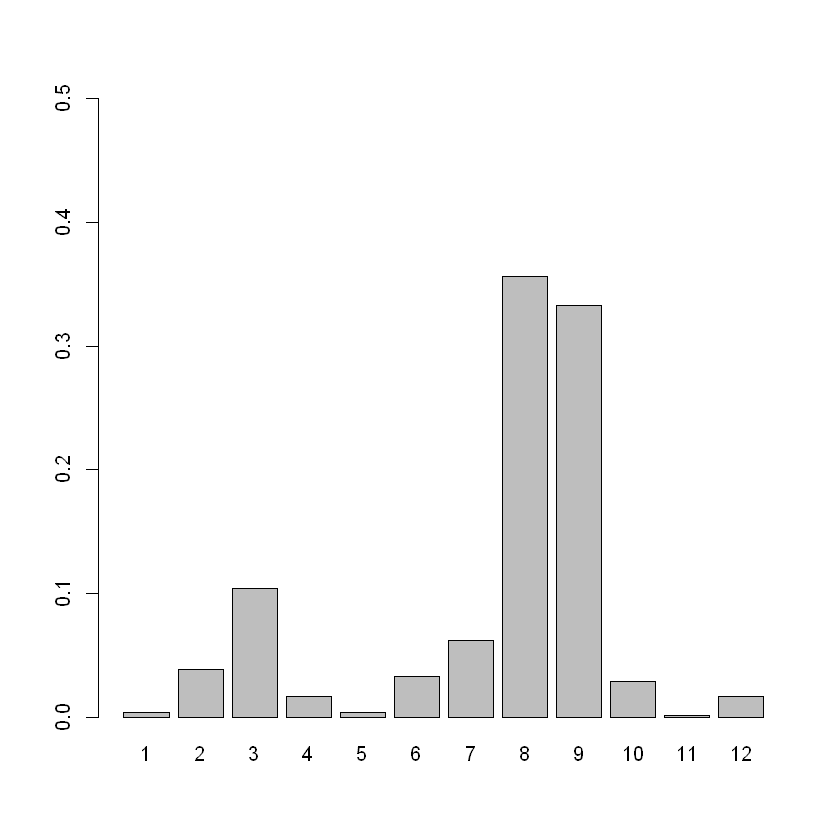

In [3]:
# We notice more fires in the park occuring in the 4-month period of June-September
barplot(table(data$month)/n,ylim=c(0,0.5))

# Actual percentage of fires in the interval June-September
percent=1-length(which(data$month!=6&data$month!=7&data$month!=8&data$month!=9))/n
cat("Percentage of fires in the interval June-September: ", percent)

We can observe that a significant portion of the fires; $\sim79\%$ lies in the 4-month period of June-September. This leads us to **"aggregate"** the values of this explanatory variable to the following: **We define the month attribute so that it is a boolean-valued variable that takes the value 1 if the month that the fire was recorded was any of the following: June, July, August, September and 0 elsewhere.**

This could lead many to question our decision, as it would be more explanatory, simple or just logical to have month take the values between 1 through 12. Actually, we took this course of action and had month be as described above. But unfortunately, this led to some very misleading results. The regression line that was produced for that model, when only the month variable was kept varied and others where constants in various levels, it showed that even in months where fires were non-existent like in October through December, there was a strong possibility of very disastrous fires taking place. This of course is ridiculous as it can be seen from the bar chart above. This phenomenon can be ascribed to the fact that the months that the most fires happened (as well as the most devastating ones), **were in a sequence**; June-September and not only that but **the frequency of the fires in these months also followed a near strictly ascending order**. This leads to the problem that for whatever values that we attributed to the other explanatory variables, the regression line on that level had a positive slope - this means that any month following September, will have (if it has) more devastasting fires that any of these 4, which is non-sense because we have insufficient data for any of the months following September (and even if fires were recorded in those months; October and December, they had their area recorded to 0ha).

Also another reason that this model is misleading is that for us humans, the difference between December and January is just one month - for the model in this case, the difference between these two months would be eleven!

Another possible course of action, which we did not explore, would be to split month to 12 distinct boolean variables, where each one corresponded to a month of the year, and it took the unit value if the fire was recorded in that year, else it had a value of 0. This of course will increase the **perplexity** of our model, as it will introduce 12 new variables in place of 1. Adding features (predictors) tends to decrease bias, at the expense of introducing additional variance, as we know. This could potentialy increase the MSE of our model, if the trade-off between bias and variance favoured variance.

In [4]:
# Making the aforementioned changes
data[which(data$month!=6&data$month!=7&data$month!=8&data$month!=9),]$month=0
data[which(data$month!=0),]$month=1

## Some plots and the exploration of the connections between the explanatory variables with other independent variables or with the dependent variable
---

In [5]:
cor(data, use="everything") # The correlations between the dependent and 
                            # independent variables of the dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.077277663,-0.0249218945,-0.02103927,-0.048384178,-0.0859161229,0.006209941,-0.05125826,0.085223194,0.01879782,0.06538717,0.0619949083
Y,0.539548171,1.000000000,-0.062752510,-0.0054533368,-0.04630755,0.007781561,-0.1011777674,-0.024487992,-0.02410308,0.062220731,-0.02034085,0.03323410,0.0388382135
month,-0.077277663,-0.062752510,1.000000000,0.0340745434,0.35376232,0.682605401,0.7933953370,0.370698052,0.61456238,0.003824557,-0.19287971,0.03535387,0.0355575605
day,-0.024921895,-0.005453337,0.034074543,1.0000000000,-0.04106833,0.062870397,0.0001049027,0.032909260,0.05219034,0.092151437,0.03247816,-0.04834015,0.0002081962
FFMC,-0.021039272,-0.046307546,0.353762321,-0.0410683308,1.00000000,0.382618800,0.3305117952,0.531804931,0.43153226,-0.300995416,-0.02848481,0.05670153,0.0467985637
DMC,-0.048384178,0.007781561,0.682605401,0.0628703973,0.38261880,1.000000000,0.6821916120,0.305127835,0.46959384,0.073794941,-0.10534225,0.07478998,0.0671527398
DC,-0.085916123,-0.101177767,0.793395337,0.0001049027,0.33051180,0.682191612,1.0000000000,0.229154169,0.49620805,-0.039191647,-0.20346569,0.03586086,0.0663597560
ISI,0.006209941,-0.024487992,0.370698052,0.0329092595,0.53180493,0.305127835,0.2291541691,1.000000000,0.39428710,-0.132517177,0.10682589,0.06766819,-0.0103468787
temp,-0.051258262,-0.024103084,0.614562376,0.0521903410,0.43153226,0.469593844,0.4962080531,0.394287104,1.00000000,-0.527390339,-0.22711622,0.06949055,0.0534865490
RH,0.085223194,0.062220731,0.003824557,0.0921514374,-0.30099542,0.073794941,-0.0391916472,-0.132517177,-0.52739034,1.000000000,0.06941007,0.09975122,-0.0536621583


In [6]:
# Creating the linear model, while NOT including the spatial independent variables
# As these, will be studied differently at the end.
fit<-lm(area~.-X-Y,data)

In [7]:
summary(fit)


Call:
lm(formula = area ~ . - X - Y, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5460 -1.1067 -0.6090  0.8758  5.7138 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.1277109  1.3802175   0.093   0.9263  
month       -0.1424500  0.3058480  -0.466   0.6416  
day          0.0017721  0.0303403   0.058   0.9534  
FFMC         0.0076873  0.0145341   0.529   0.5971  
DMC          0.0012756  0.0014796   0.862   0.3890  
DC           0.0003966  0.0004425   0.896   0.3706  
ISI         -0.0226305  0.0171961  -1.316   0.1888  
temp         0.0064831  0.0196563   0.330   0.7417  
RH          -0.0043101  0.0056076  -0.769   0.4425  
wind         0.0752979  0.0367373   2.050   0.0409 *
rain         0.0876678  0.2143783   0.409   0.6828  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.398 on 506 degrees of freedom
Multiple R-squared:  0.02031,	Adjusted R-squared:  0.0009523 
F-statistic: 1.04

In [8]:
library(geometry) # To use the dot function of this package
b_coeff = c(1,rep(c(0),each=10))
for (i in 3:(ncol(data)-1)){
    b_coeff[i-1] = mean(data[,i])
}
# This is just to take the "best" cross-cut for the values 
# of the other explanatory variables that are NOT presented in the graph,
# to draw a "good" line from the regression plane to the corresponding
# plane created by the dependent and corresponding indpendent variable.

Warning message:
"package 'geometry' was built under R version 4.0.5"


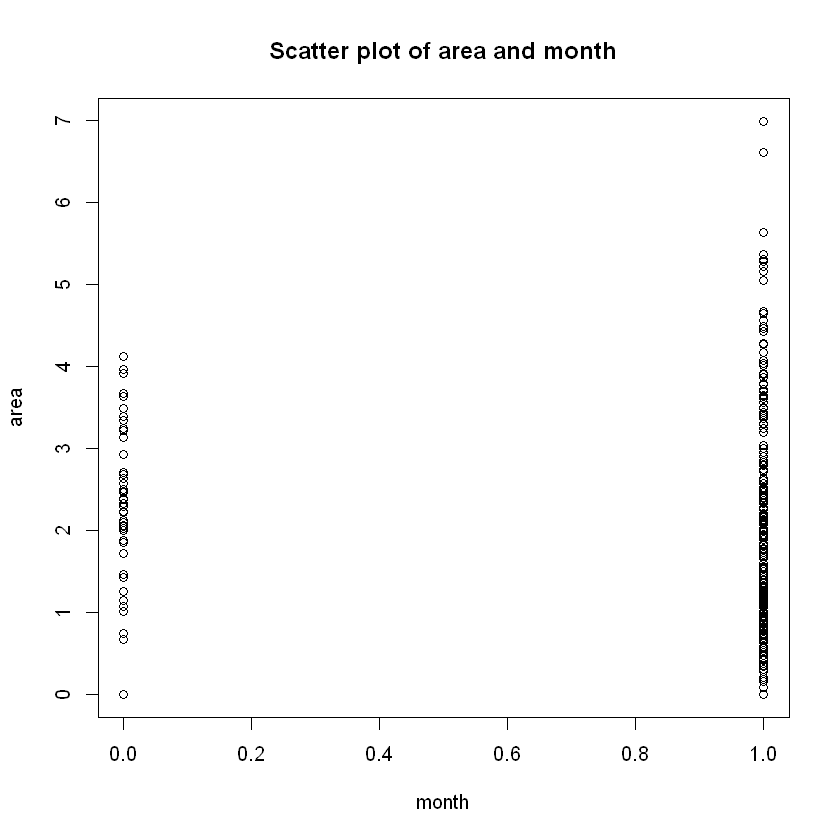

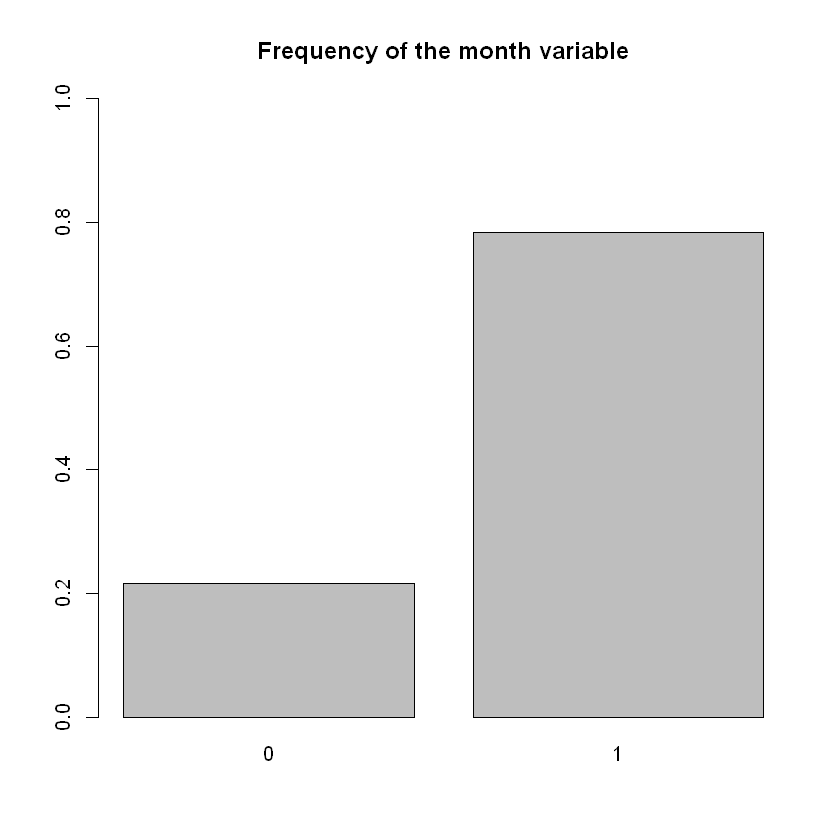

In [9]:
plot(data$month,data$area, xlab="month", ylab="area", 
     main="Scatter plot of area and month")
barplot(table(data$month)/n,ylim=c(0,1), main="Frequency of the month variable")

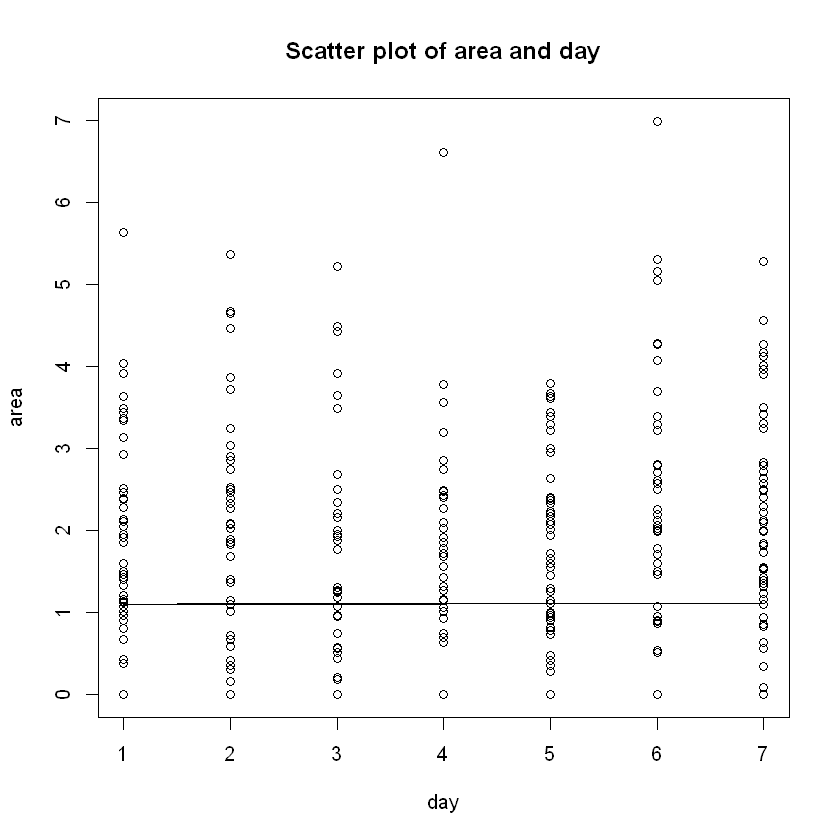

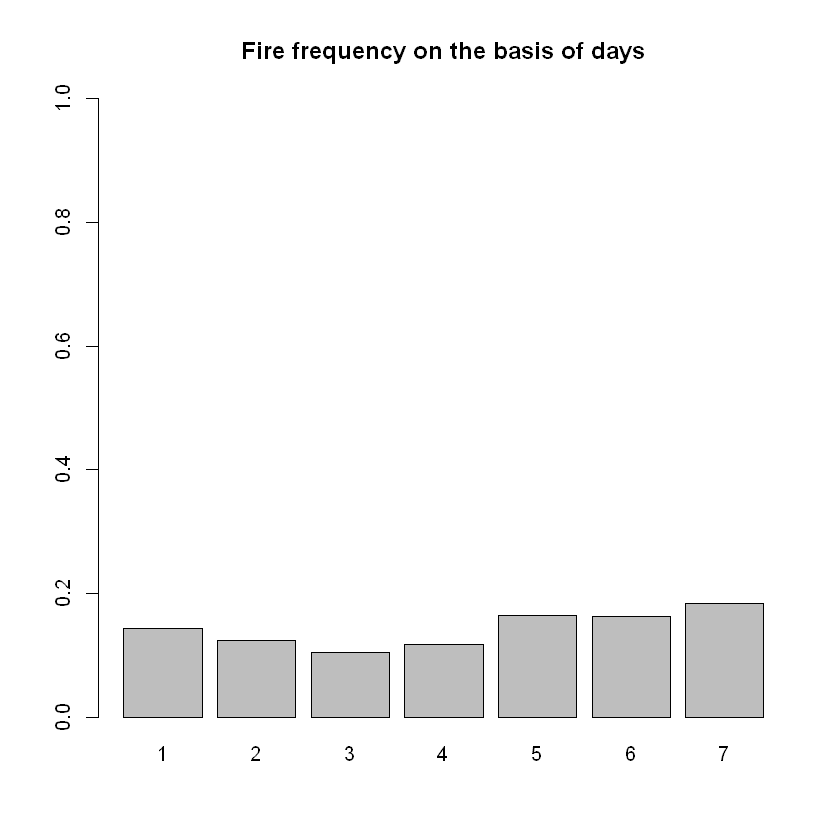

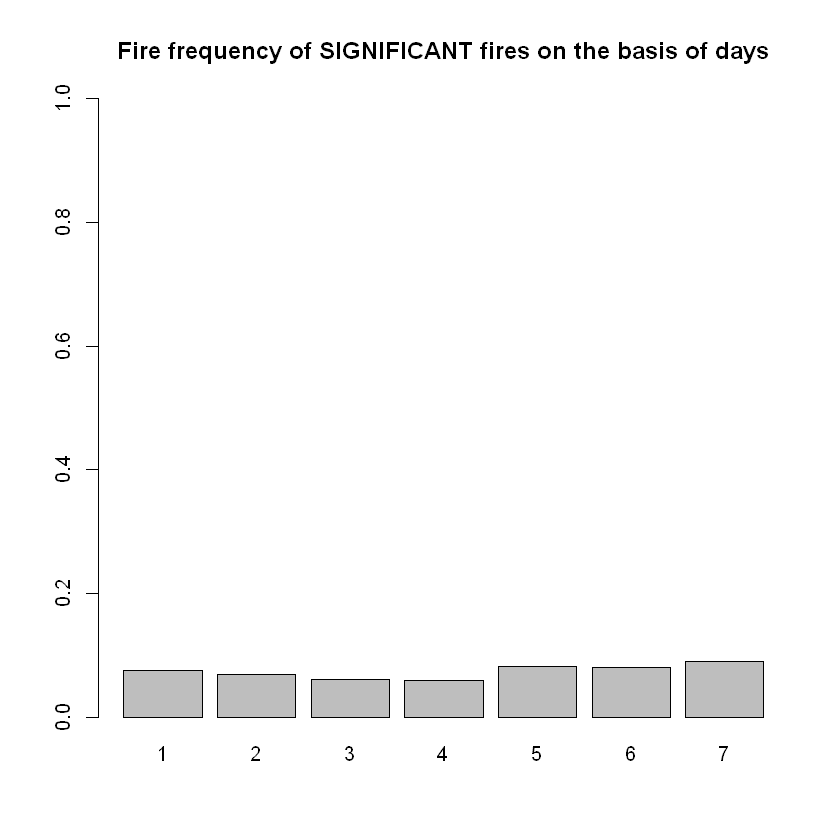

In [10]:
day_fun=function(x){fit$coeff[3]*x+dot(b_coeff[-3],fit$coeff[-3])}
plot(data$day,data$area, xlab="day", ylab="area", 
     main="Scatter plot of area and day")
lines(x=data$day,y=day_fun(data$day))
# As expected, there seems to be zero statistical significance to the day
# the fire occured and its destructiveness.

barplot(table(data$day)/n,ylim=c(0,1), 
        main="Fire frequency on the basis of days")
barplot(table(data[which(data$area!=0),]$day)/n,ylim=c(0,1),
       main="Fire frequency of SIGNIFICANT fires on the basis of days") 
# As expected, there seems to be zero statistical significance to frequency
# of the fires occured regarding the day that they occurred.

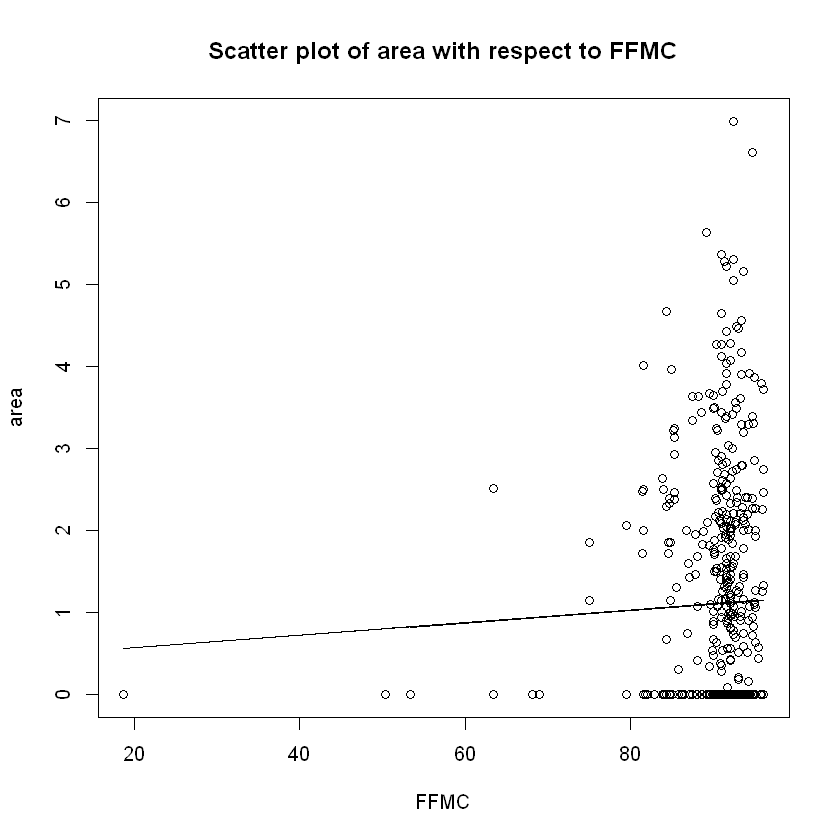

In [11]:
FFMC_fun=function(x){fit$coeff[4]*x+dot(b_coeff[-4],fit$coeff[-4])}
plot(data$FFMC,data$area,xlab="FFMC", ylab="area",
    main="Scatter plot of area with respect to FFMC")
lines(x=data$FFMC,y=FFMC_fun(data$FFMC))

---

Here we are able to see a trend. For higher values of the fuel moisture FFMC index more intense fires were recorded. Acutally according to fire science subtracting the FFMC value from 100 can provide an estimate for the equivalent (approximately 10h) fuel moisture content (**FMC**; $FMC=1-FFMC$), most accurate when FFMC values are roughly above 80, which is just the case for our data. Now, according to the paper **"Moisture content thresholds for ignition and rate of fire spread for various dead fuels in northeast forest ecosystems of China"**, cited below, _"Fuel moisture content is one of the important factors that determine ignition probability and fire behaviour in forest ecosystems."_ **It supports that as FMC decreases, thus FFMC increases in the same manner, then the area of fire increases.** **This is also supported by the FWI structure flow chart provided at the beginning**, as the fire behaviour index, ISI - Initial Spread Index is affected by the FFMC (which we will see that it increases as FFMC increases) and while ISI increases, it is logical that also the area of the fire increases as well, attributed to the approximate functional relation that we proved at (\ref{eq:1}).

---

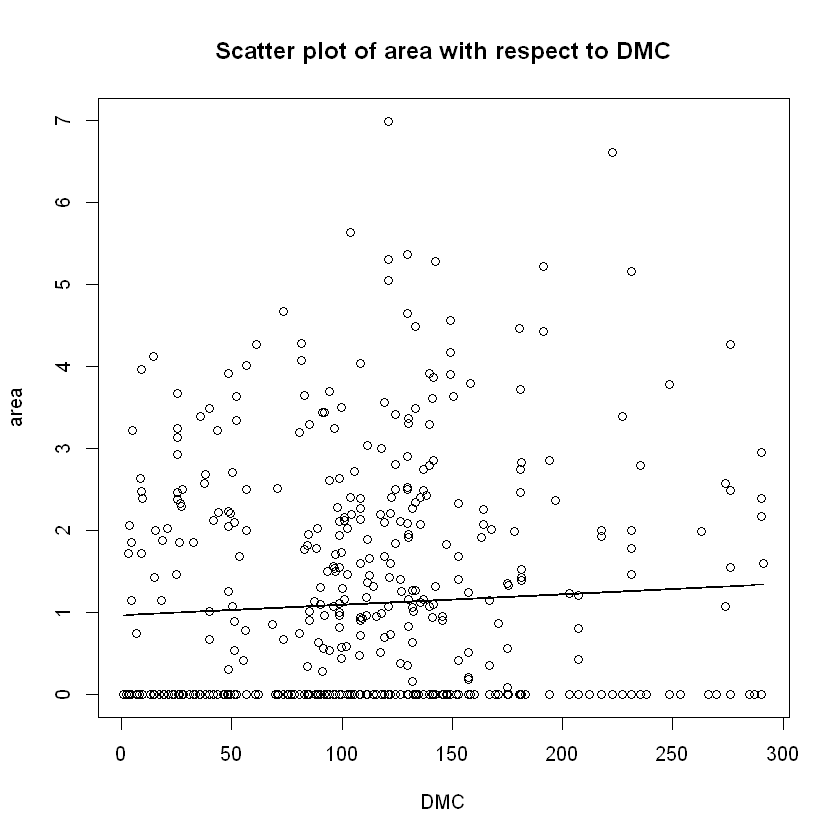

In [12]:
DMC_fun=function(x){fit$coeff[5]*x+dot(b_coeff[-5],fit$coeff[-5])}
plot(data$DMC,data$area,xlab="DMC", ylab="area",
    main="Scatter plot of area with respect to DMC")
lines(x=data$DMC,y=DMC_fun(data$DMC))
# Moisture in the DMC layer is expected to help prevent burning 
# in material deeper down in the available fuel.
# Thus DMC decreasing => burnt area decreasing. This is apparent
# from the many 0 values that we have for burnt area for smaller DMC.

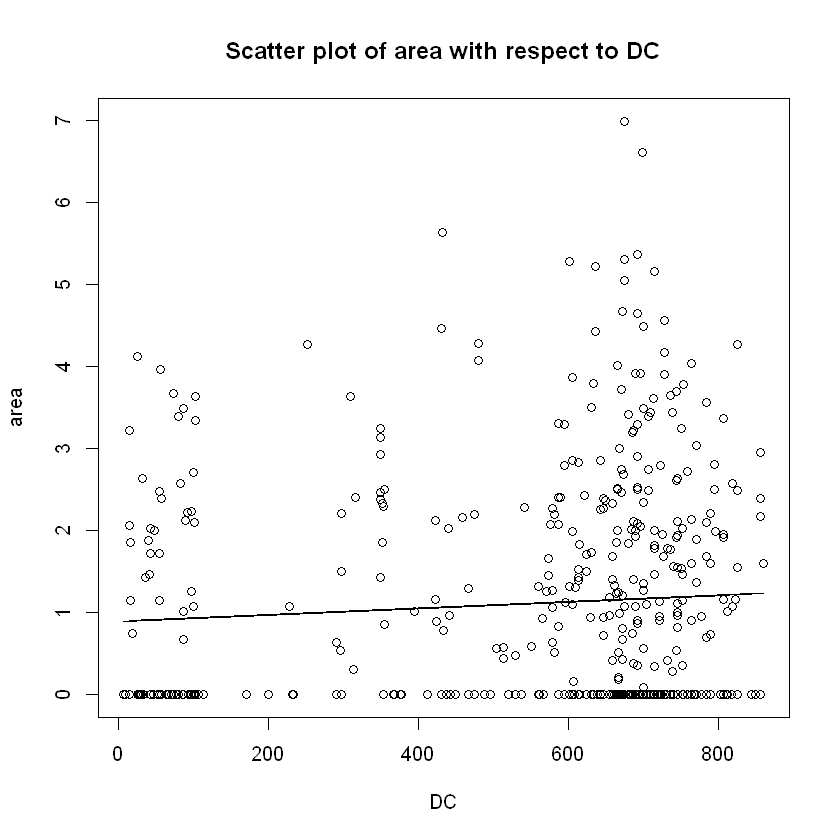

In [13]:
DC_fun=function(x){fit$coeff[6]*x+dot(b_coeff[-6],fit$coeff[-6])}
plot(data$DC,data$area,xlab="DC", ylab="area",
    main="Scatter plot of area with respect to DC")
lines(x=data$DC,y=DC_fun(data$DC))
# Drought Code increasing => burnt area increasing, as expected.
# But still many ~0 area fires are noticed for higher values of DC
# which could be attributed to many other factors.

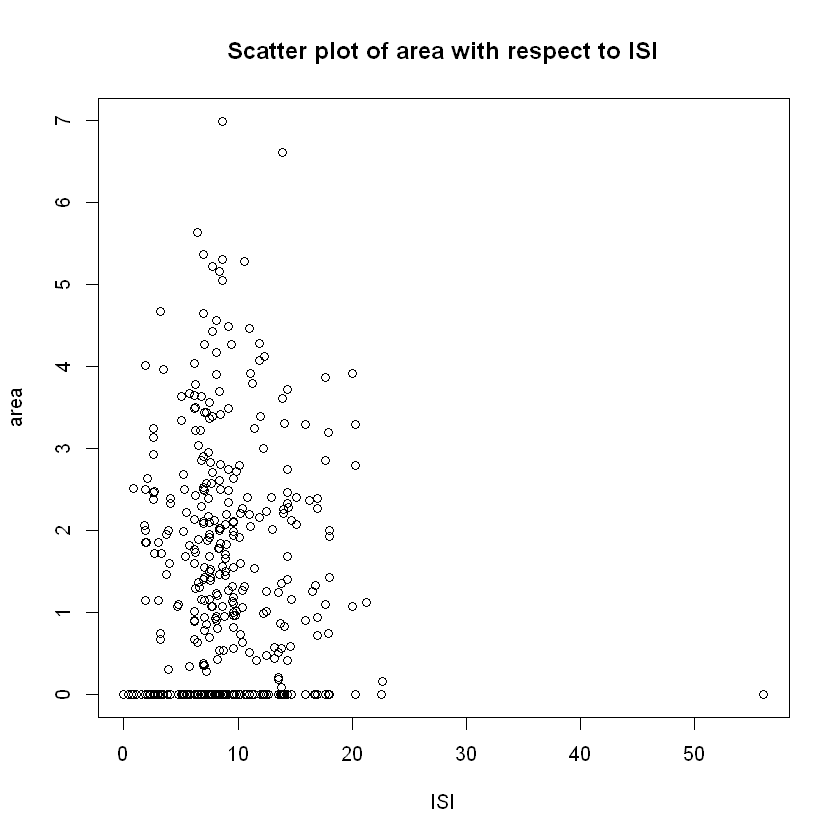

Covariance and correlation between ISI and wind speed:  0.8726606  and  0.1068259 respectively. 


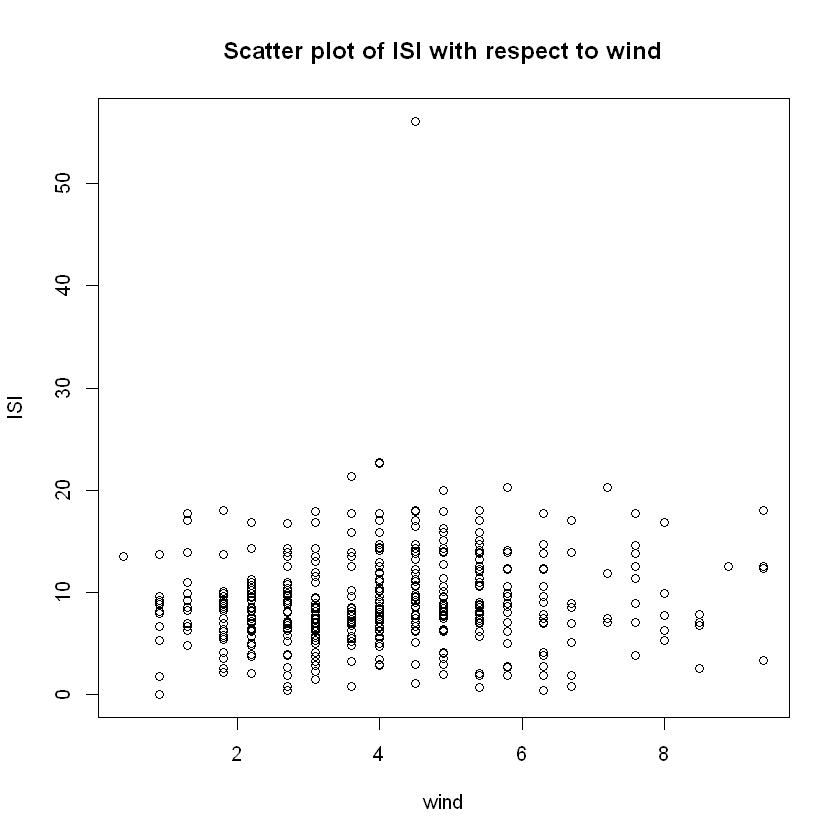

Covariance between ISI and FFMC:  13.3849

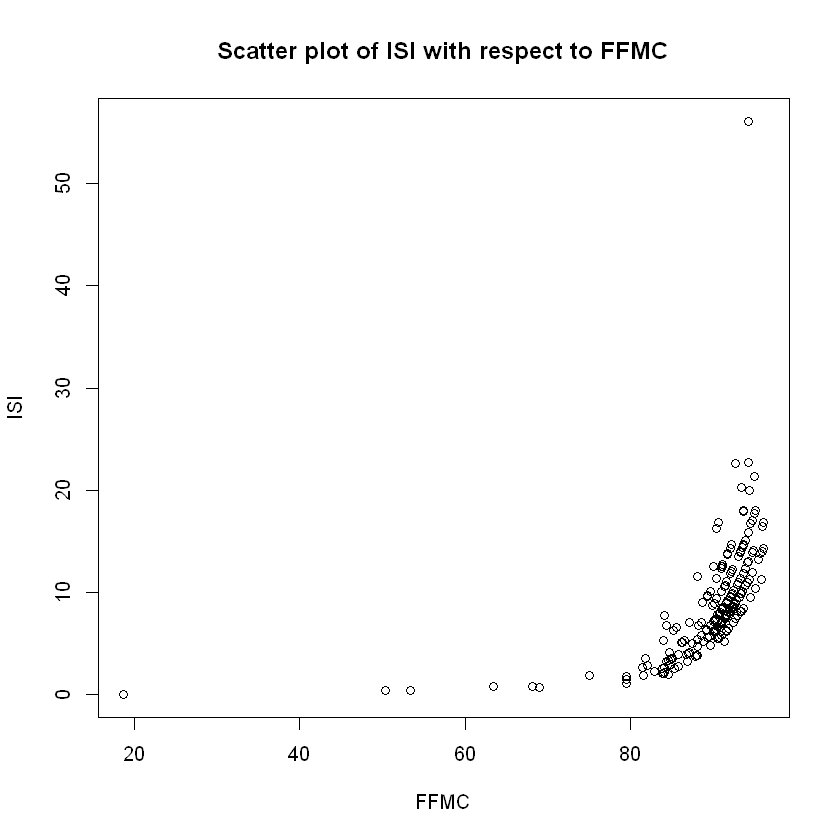

In [14]:
ISI_fun=function(x){fit$coeff[7]*x+dot(b_coeff[-7],fit$coeff[-7])}
plot(data$ISI,data$area,xlab="ISI", ylab="area",
    main="Scatter plot of area with respect to ISI")


plot(data$wind,data$ISI,xlab="wind", ylab="ISI",
    main="Scatter plot of ISI with respect to wind")
# Checking the validity of the theory we refered to in the introduction
cat("Covariance and correlation between ISI and wind speed: ", 
    cov(data$ISI,data$wind)," and ",cor(data$ISI,data$wind), "respectively. \n")
plot(data$FFMC,data$ISI,xlab="FFMC", ylab="ISI",
    main="Scatter plot of ISI with respect to FFMC")
# Checking the validity of the theory we refered to in the introduction
cat("Covariance between ISI and FFMC: ", 
    cov(data$ISI,data$FFMC))

---

It is clear from the scatter plot between ISI and FFMC, that they theory is validated, and ISI increases while FFMC increases, and in a quadratic or maybe even in an exponential way. 

The problem we see is between ISI and wind speed. While the theory states that ISI is positevely affected by wind speed, this does not appear in the corresponding scatter plot and their corresponding sample covariance and correlation could be considered to be rather small. This is mostly attributed to the fact that _while wind speed is by nature a continuously-valued variable, this does not show up in our data. In all of the 517 observations collected, wind speed only takes values from the set:_ $\{0.4, 0.9, 1.3, 1.8, 2.2,2.7,3.1,3.6,4,4.5,4.9,5.4,5.8,6.3,6.7,7.2,7.6,8,8.5,8.9,9.4 \}$ - **only 21 values which gives it a kind of discrete nature** and leaves us unable to make cogent inferences just from the scatter plot; further statistical analysis is required before we make any conclusive statements.

---

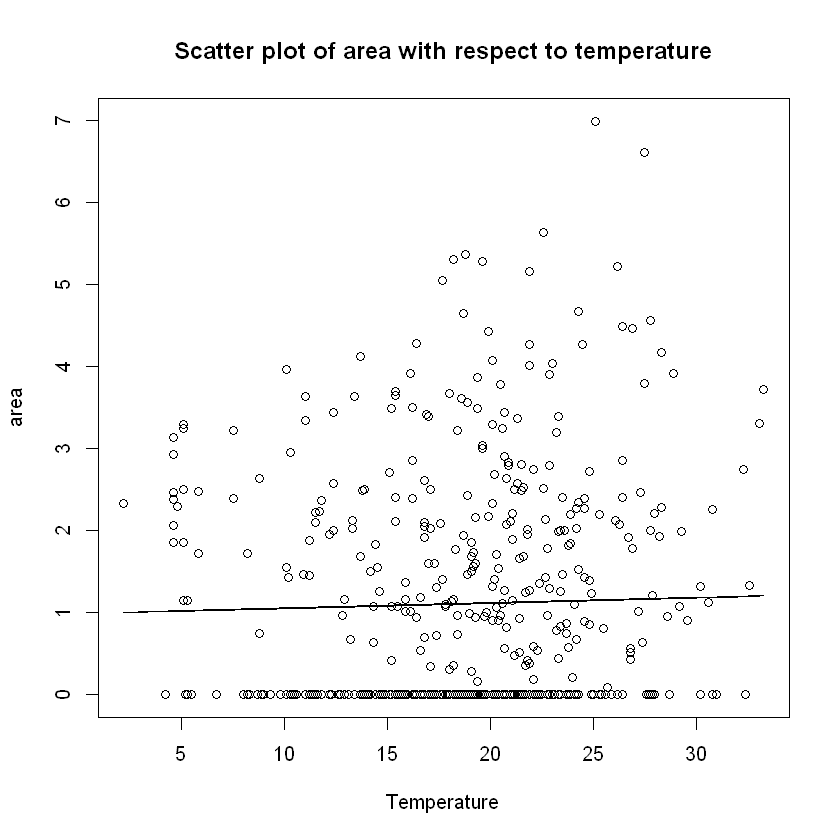

Covariance and correlation between month and temperature:  1.471486  and  0.6145624 respectively. 


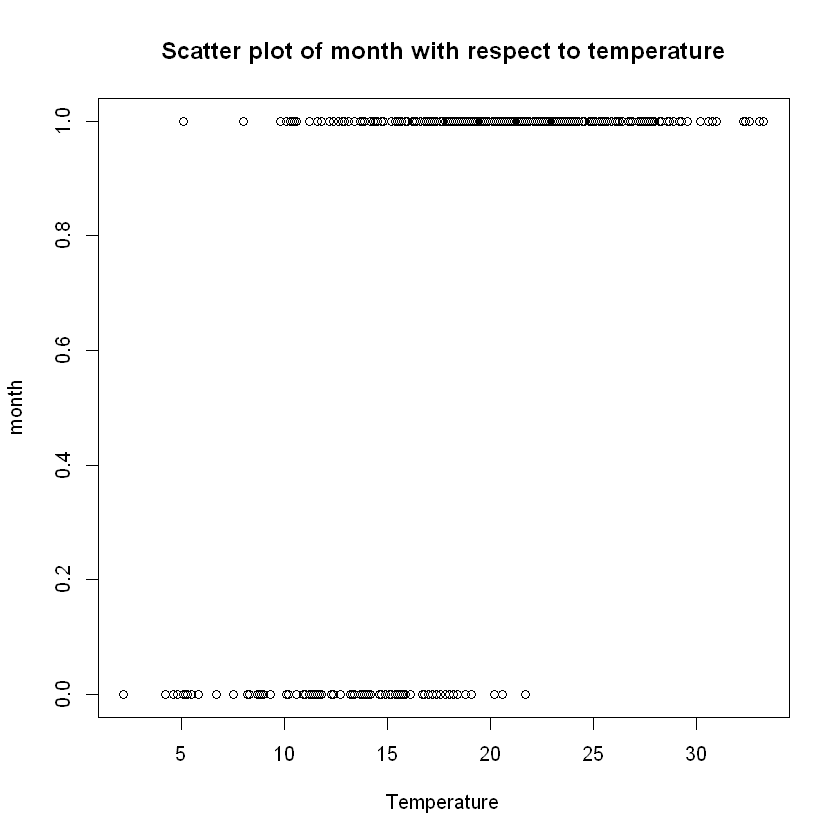

Covariance and correlation between FFMC and temperature:  13.832  and  0.4315323 respectively. 


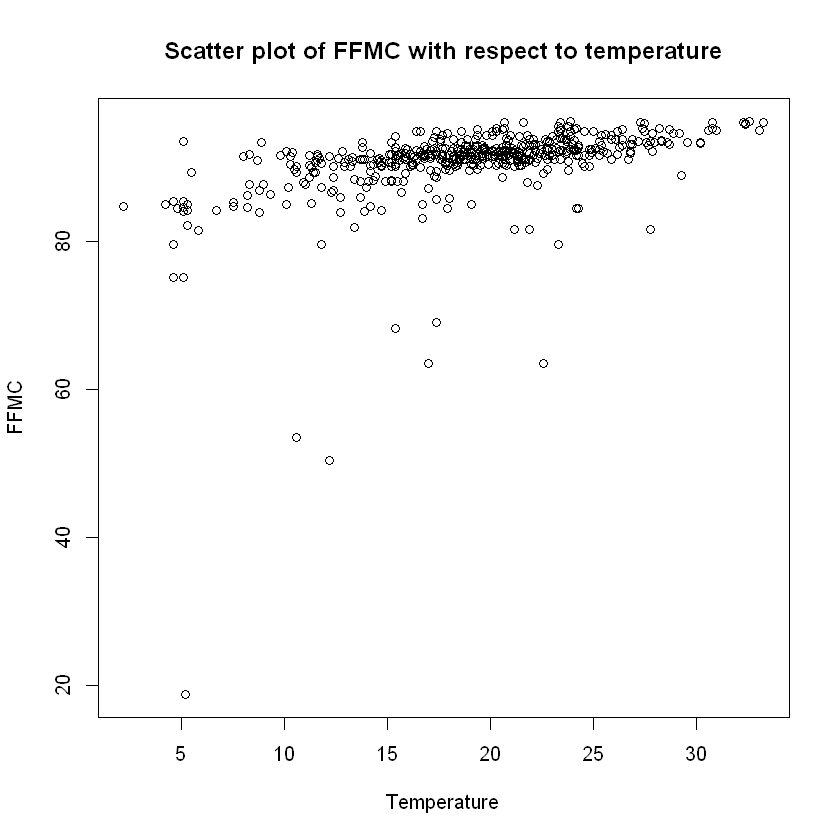

Covariance and correlation between DMC and temperature:  174.6391  and  0.4695938 respectively. 


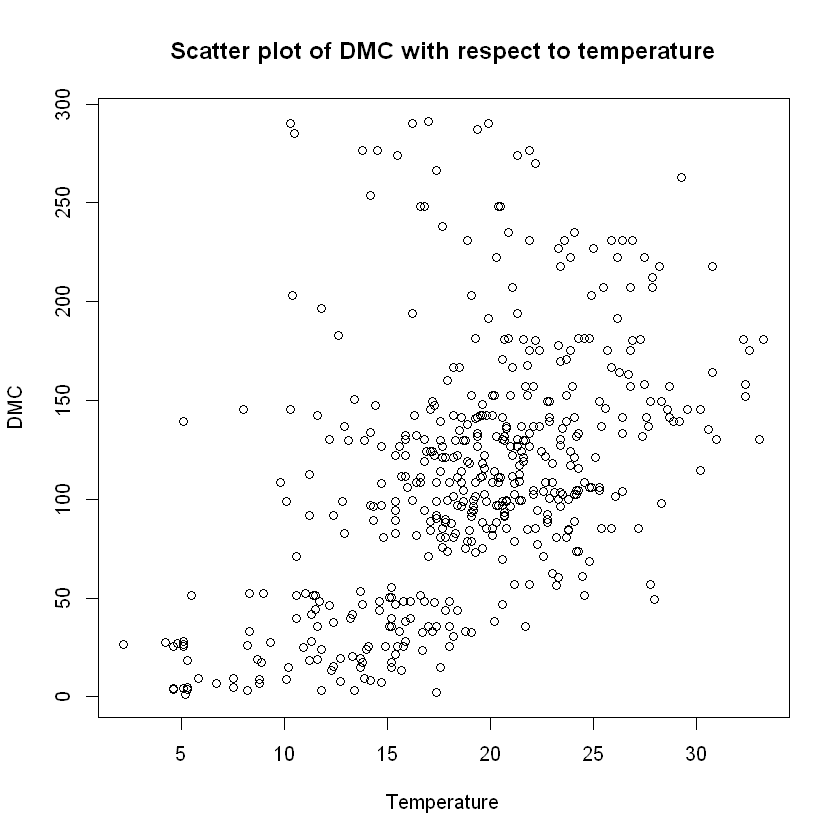

Covariance and correlation between DC and temperature:  714.7517  and  0.4962081 respectively. 


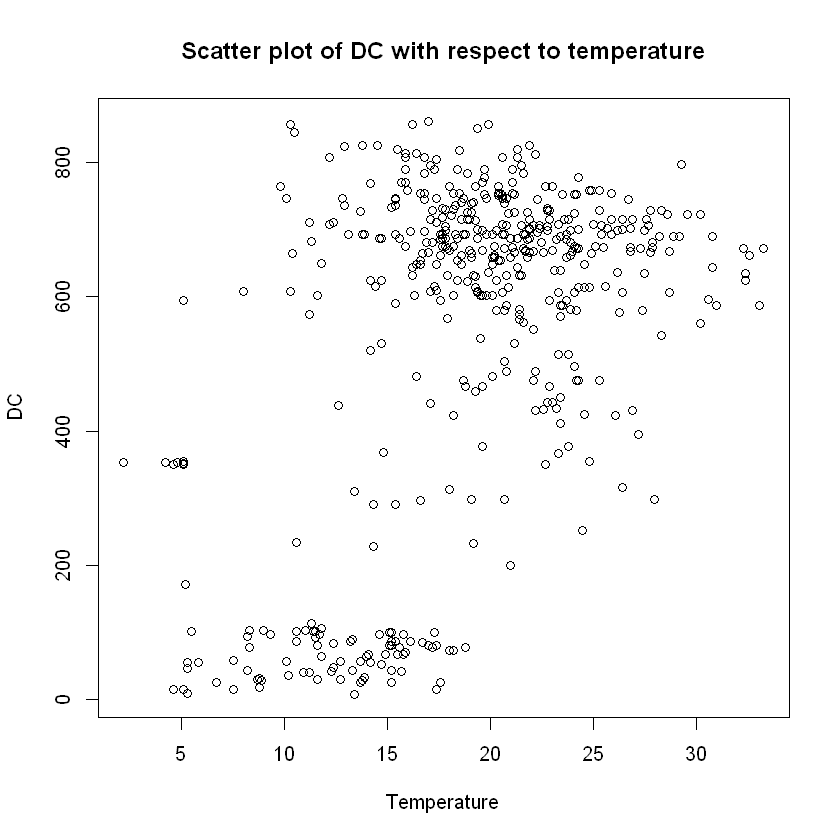

In [15]:
temp_fun=function(x){fit$coeff[8]*x+dot(b_coeff[-8],fit$coeff[-8])}

plot(data$temp,data$area, xlab="Temperature", ylab="area",
    main="Scatter plot of area with respect to temperature")
lines(x=data$temp,y=temp_fun(data$temp))

plot(data$temp,data$month, xlab="Temperature", ylab="month",
    main="Scatter plot of month with respect to temperature")
cat("Covariance and correlation between month and temperature: ", 
    cov(data$month,data$temp)," and ",cor(data$month,data$temp), "respectively. \n")

plot(data$temp,data$FFMC, xlab="Temperature", ylab="FFMC",
    main="Scatter plot of FFMC with respect to temperature")
cat("Covariance and correlation between FFMC and temperature: ", 
    cov(data$FFMC,data$temp)," and ",cor(data$FFMC,data$temp), "respectively. \n")

plot(data$temp,data$DMC, xlab="Temperature", ylab="DMC",
    main="Scatter plot of DMC with respect to temperature")
cat("Covariance and correlation between DMC and temperature: ", 
    cov(data$DMC,data$temp)," and ",cor(data$DMC,data$temp), "respectively. \n")

plot(data$temp,data$DC,xlab="Temperature", ylab="DC",
    main="Scatter plot of DC with respect to temperature")
cat("Covariance and correlation between DC and temperature: ", 
    cov(data$DC,data$temp)," and ",cor(data$DC,data$temp), "respectively. \n")

---

Here we notice clearly that area seems to positevely correlated with temperature (see also covariance and correlation matrix provided above). 

Also, it is logical to check the scatter plot between month and temperature where we see that, like it should be expected, higher temperatures (>22 degrees Celsius) **only** appear in the "hot-months" group of June through September and in great density. Not only that, but we see the great positive correlation between these two independent variables.

Lastly, the FWI states that temperature affects **ALL** of the Fuel Moisture codes; FFMC, DMC and DC and this is established by the above scatter plots and calculations of their pairwise covariances and correlations.

---

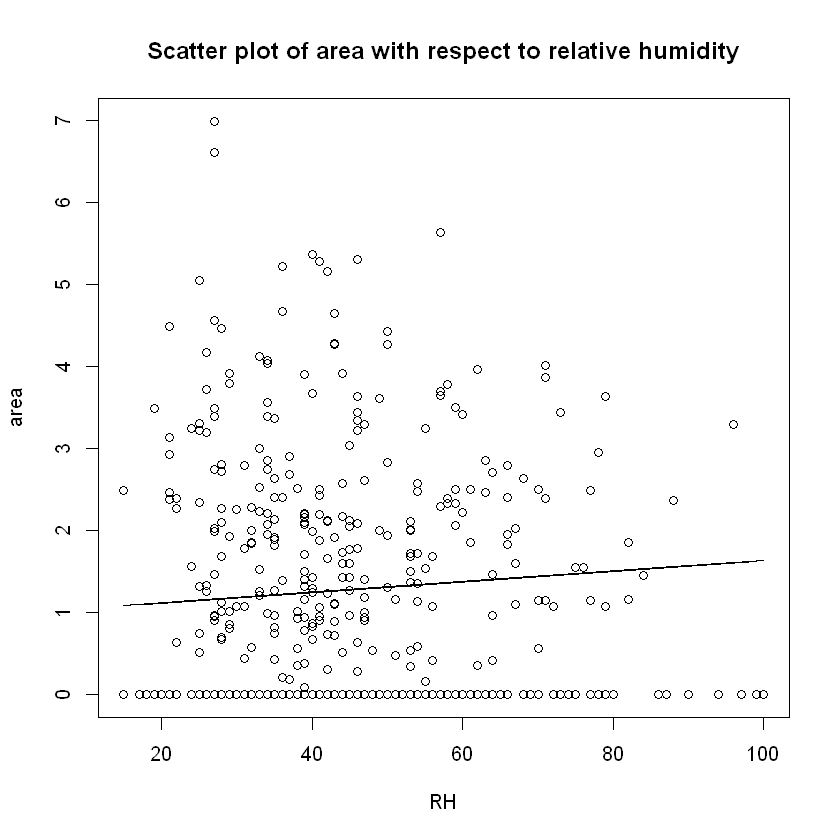

Covariance and correlation between RH and FFMC:  -27.11193  and  -0.3009954 respectively. 


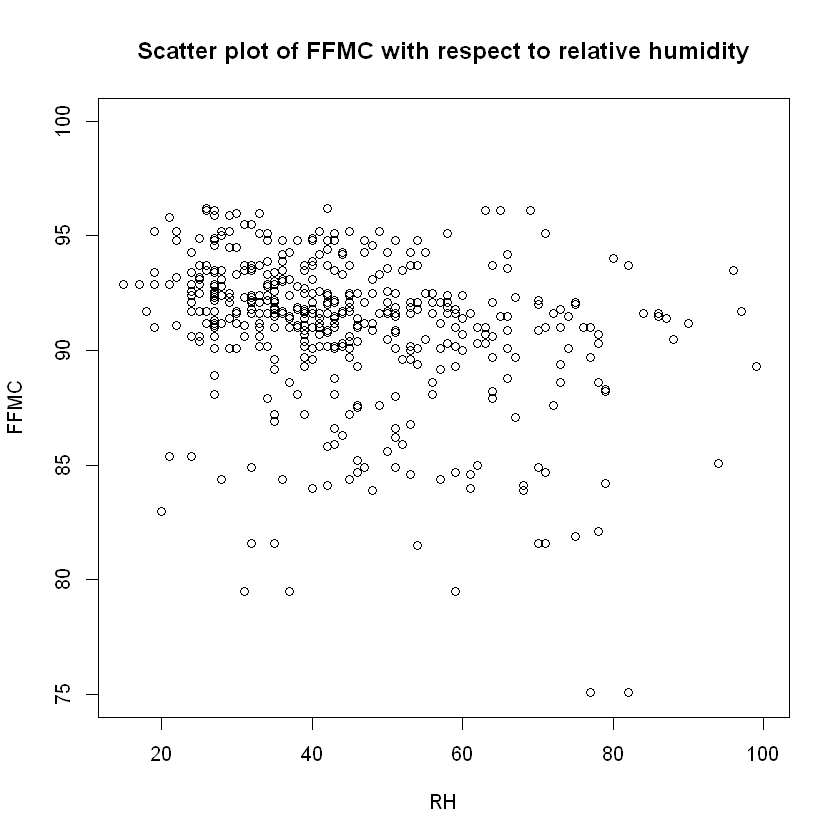

Covariance and correlation between RH and DMC:  77.12136  and  0.07379494 respectively. 


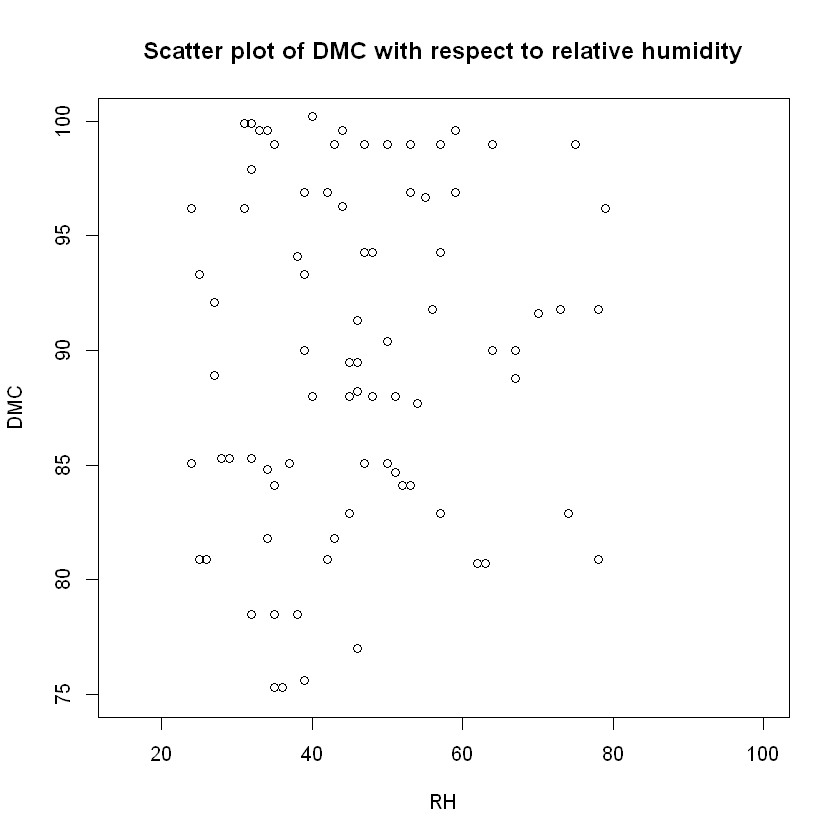

In [16]:
RH_fun=function(x){fit$coeff[9]*x+dot(b_coeff[-9],fit$coeff[-9])}
plot(data$RH,data$area,xlab="RH", ylab="area",
    main="Scatter plot of area with respect to relative humidity")
lines(x=data$RH,y=temp_fun(data$RH))

plot(data$RH,data$FFMC,ylim=c(75,100),xlab="RH", ylab="FFMC",
    main="Scatter plot of FFMC with respect to relative humidity")
cat("Covariance and correlation between RH and FFMC: ", 
    cov(data$RH,data$FFMC)," and ",cor(data$RH,data$FFMC), "respectively. \n")

plot(data$RH,data$DMC,ylim=c(75,100),xlab="RH", ylab="DMC",
    main="Scatter plot of DMC with respect to relative humidity")
cat("Covariance and correlation between RH and DMC: ", 
    cov(data$RH,data$DMC)," and ",cor(data$RH,data$DMC), "respectively. \n")

---

Due to the fact the theory states that the lower the relative humidity measured (in percentage) in the air is, the higher the Fine Fuel Moisture Code (FFMC) is, this means that the most destructive fires are witnessed with lower percentages of air humidity. This is of course due to the fact that as FFMC increases so does the likelihood of the fire being more destructive!

Now, while the scatter plot of FFMC vs. RH does support the above statement, the same cannot be stated for DMC vs RH, which according to FWI's structure DMC is affected by RH, but in their corresponding scatter plot shows no signs of any pattern.

---

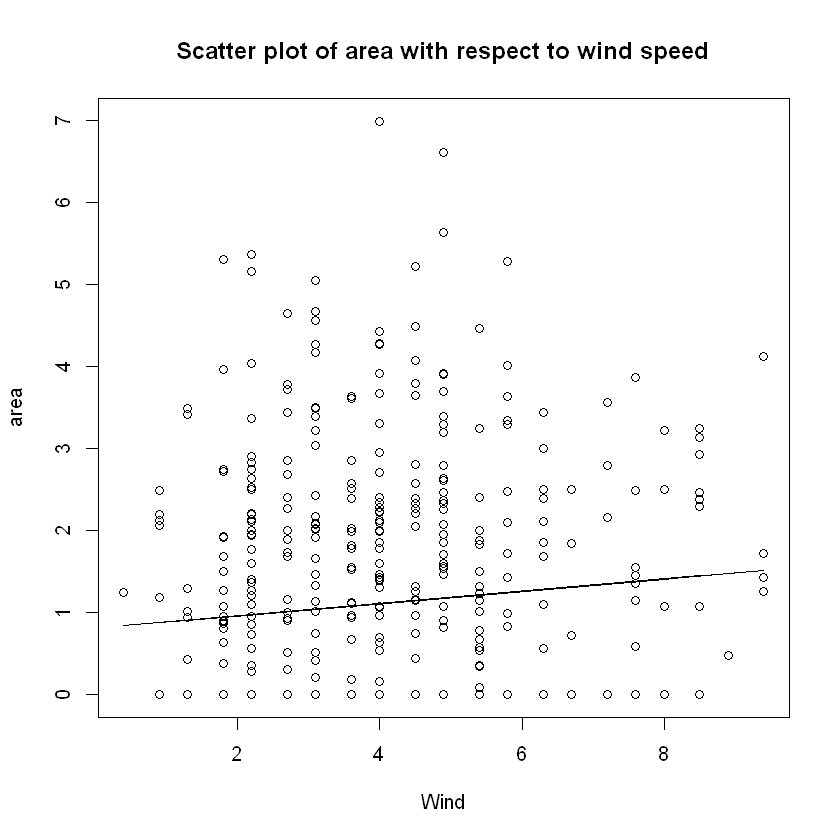

In [17]:
wind_fun=function(x){fit$coeff[10]*x+dot(b_coeff[-10],fit$coeff[-10])}
plot(data$wind,data$area,xlab="Wind", ylab="area",
    main="Scatter plot of area with respect to wind speed")
lines(x=data$wind,y=wind_fun(data$wind))

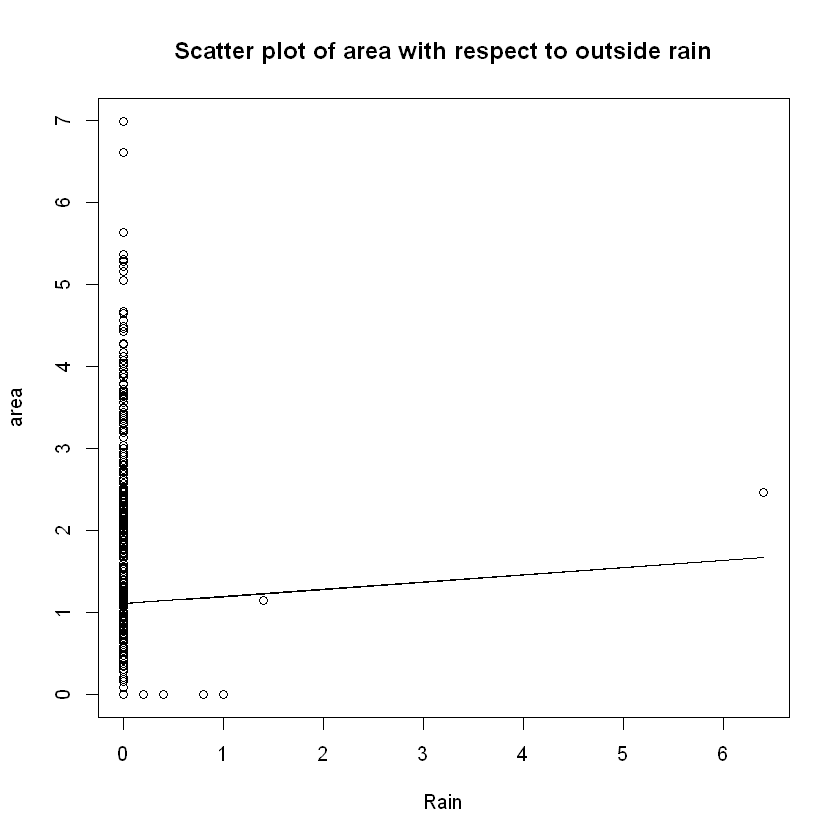

In [18]:
rain_fun=function(x){fit$coeff[11]*x+dot(b_coeff[-11],fit$coeff[-11])}
plot(data$rain,data$area,xlab="Rain", ylab="area",
    main="Scatter plot of area with respect to outside rain")
lines(x=data$rain,y=rain_fun(data$rain))

---

As expected, **NEARLY ALL** of the fires that were recorded in this time frame at Montesinho Natural Park, had a common attribute - **there was no (or negligible) outside rain recorded at that time.**
___

Residual Analysis
---
___

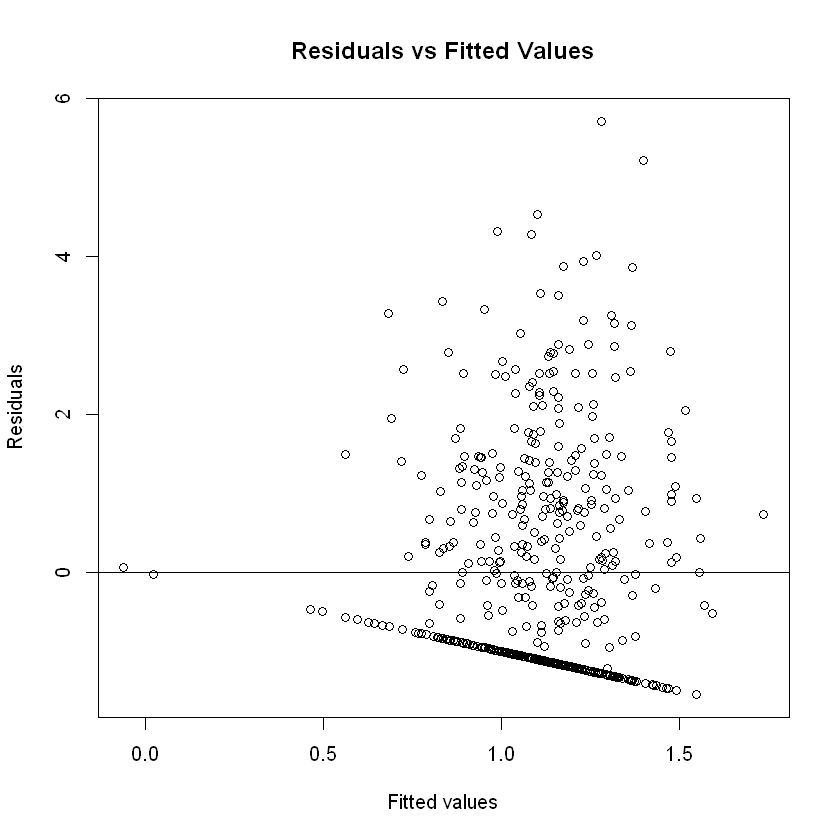

In [19]:
res=fit$residuals
plot(fit$fitted,res,xlab="Fitted values", ylab="Residuals",
    main="Residuals vs Fitted Values")
abline(h=0)

Due to how the graph is, it looks like the residuals **might be correlated**, while homoscedasticity seems to hold. This is due to the "line" that forms in this plot. 

This "line" can be attributed to several factors. Firstly, the error terms might indeed be correlated/not independent. This might be the case for 2 prevalent reasons;
1. It is possible that in cases of rekindling, the people who gathered the data were putting down this "fires" as new ones, which due to how close they happened in time, it is possible the variables for the weather observations were the same and the ones describing the fuel moisture codes were affected by the previous fire, leading to correlated measures.
2. If a fire happened somewhere in the park, were a previous fire was recorded, it is possible that the effects of the previous one affected the range of the next one, leading of course to correlation between the two measures. **This need of course to be validated using also the spatial variables that we excluded from our model**.

But this "line" could also be attributed to the fact that there was a significant amount of fires that were put down as having 0ha of area in range, thus this phenomenon we see **might have nothing to do with the correlation/dependance between the measures**. 

We need to plot the residuals against the independent variables as well, to validate this. This will also help us to establish the fact that homoscedasticity also holds.

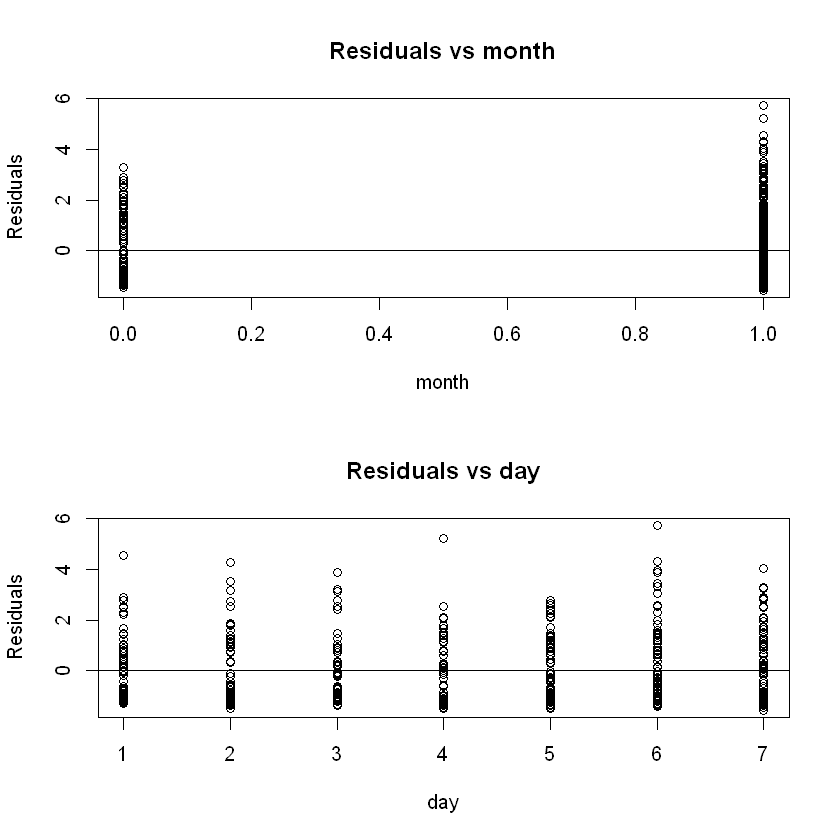

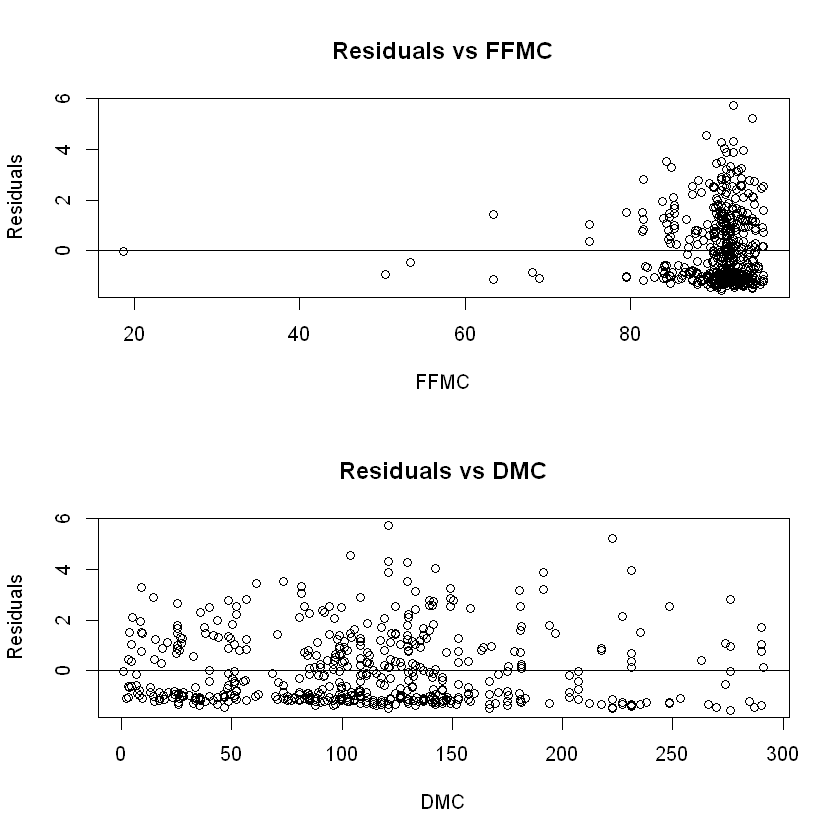

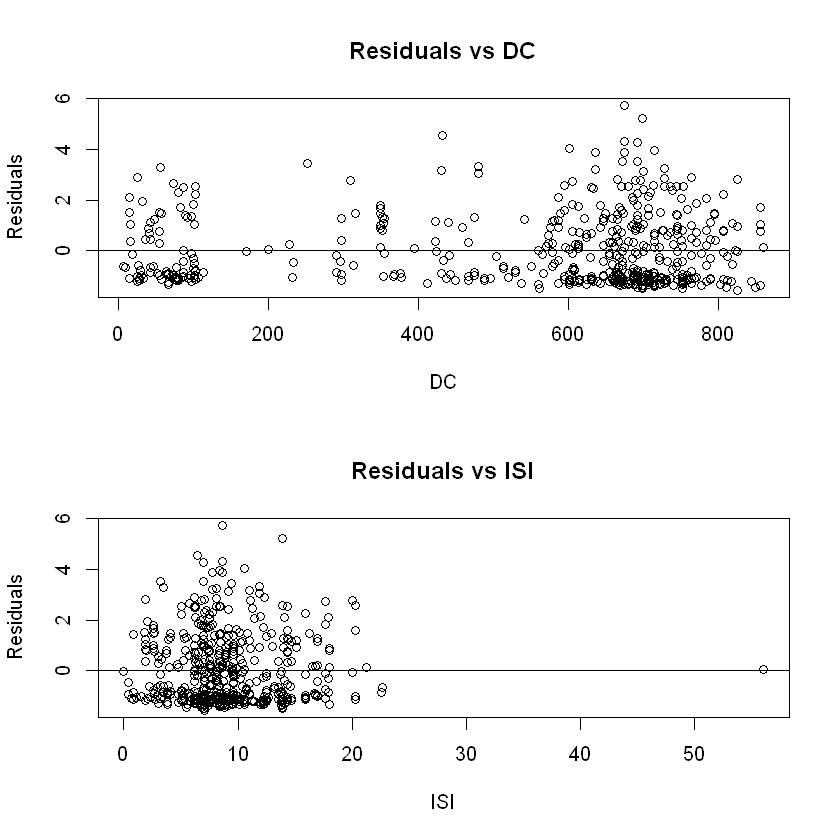

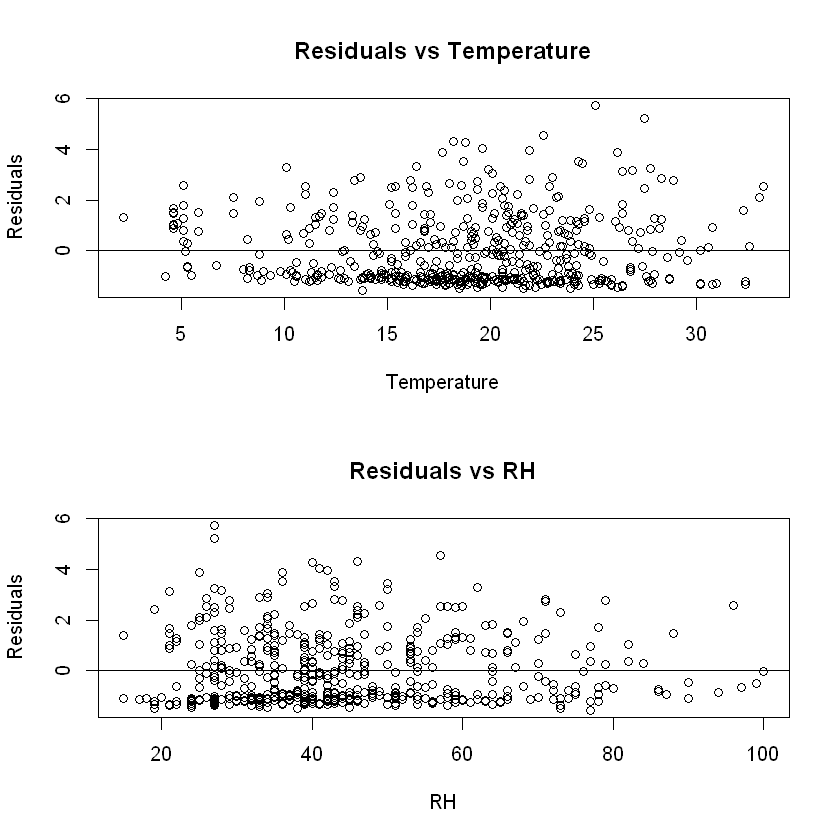

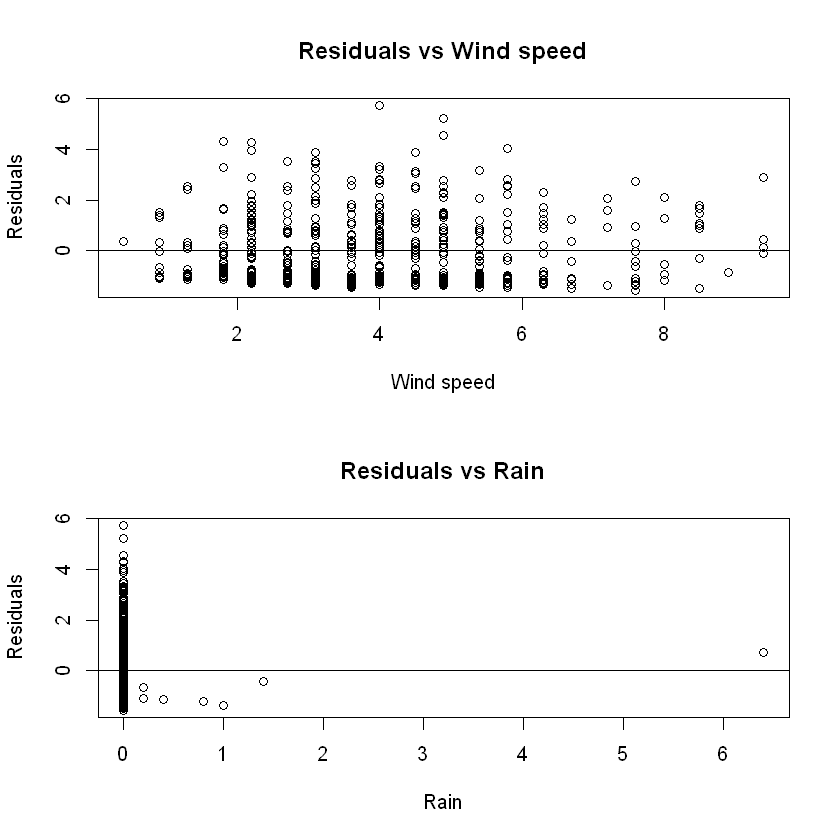

In [20]:
par(mfrow=c(2,1))
plot(data$month,res,xlab="month", ylab="Residuals",
    main="Residuals vs month")
abline(h=0)
plot(data$day,res,xlab="day", ylab="Residuals",
    main="Residuals vs day")
abline(h=0)

par(mfrow=c(2,1))
plot(data$FFMC,res,xlab="FFMC", ylab="Residuals",
    main="Residuals vs FFMC")
abline(h=0)
plot(data$DMC,res,xlab="DMC", ylab="Residuals",
    main="Residuals vs DMC")
abline(h=0)


par(mfrow=c(2,1))
plot(data$DC,res,xlab="DC", ylab="Residuals",
    main="Residuals vs DC")
abline(h=0)
plot(data$ISI,res,xlab="ISI", ylab="Residuals",
    main="Residuals vs ISI")
abline(h=0)


par(mfrow=c(2,1))
plot(data$temp,res,xlab="Temperature", ylab="Residuals",
    main="Residuals vs Temperature")
abline(h=0)
plot(data$RH,res,xlab="RH", ylab="Residuals",
    main="Residuals vs RH")
abline(h=0)


par(mfrow=c(2,1))
plot(data$wind,res,xlab="Wind speed", ylab="Residuals",
    main="Residuals vs Wind speed")
abline(h=0)
plot(data$rain,res,xlab="Rain", ylab="Residuals",
    main="Residuals vs Rain")
abline(h=0)

So it quite safe to assume that:

\begin{equation} \label{eq:2}
Var(\vec{ε})= σ^2\mathbf{I}_n
\end{equation}

where $\sigma>0$ is a constant, from now on.

As for the normality of the residuals:

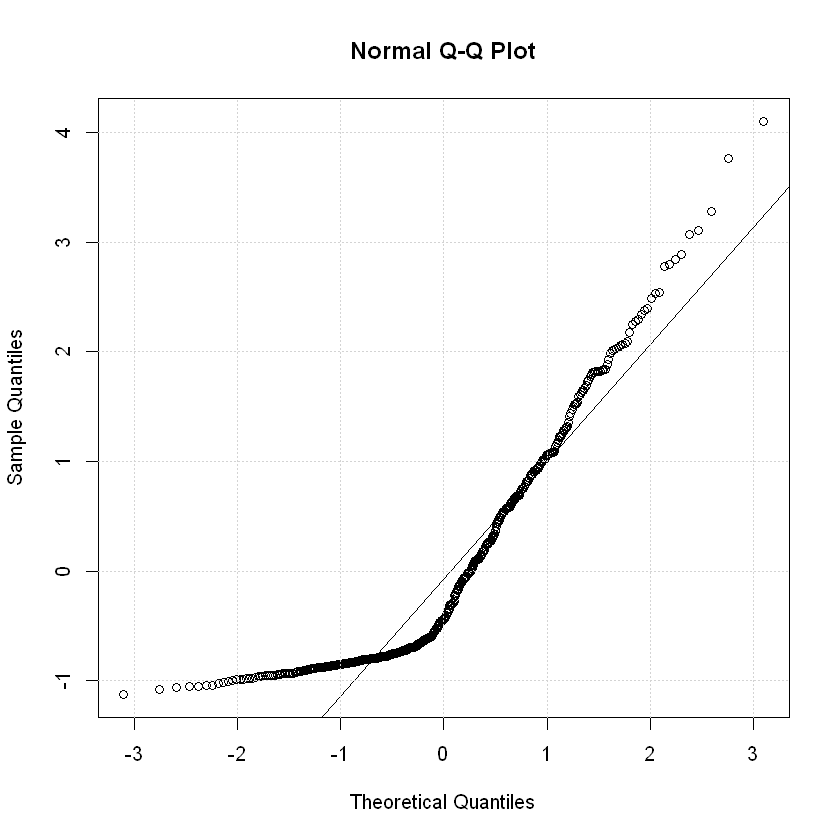

In [21]:
e = fit$residuals
sigma=summary(fit)$sigma

# The diagonal of the Hat/Influence matrix
h = hatvalues(fit)
e_studentized = e/(sigma*sqrt(1-h))
qqnorm(e_studentized)
qqline(e_studentized)
grid()

While a kind of "divergence" is apparent for the negative residuals - **which is of course attributed to the "line" that we observed in the scatter plot of the residuals against the fitted values**, this shows us that to a good degree of precision, the normality assumption of the error terms in our model holds water. This means that (\ref{eq:2}), becomes:

\begin{equation} \label{eq:3}
\vec{ε}\stackrel{\text{i.i.d}}{\sim}\mathcal{N}(\vec{0},\sigma^2\mathbf{I}_n)
\end{equation}



Also, under (\ref{eq:3}), we know that $\text {Cov}(\vec{e},\vec{\hat{Y}})=\mathbf{0}\in\mathbf{R}^{nxn}$, which holds for our case (so we can feel better about our assumptions at (\ref{eq:3})):

In [22]:
cat(cov(res,fit$fitted),"~= 0") 

4.157096e-17 ~= 0



---

## Multicolinearity
___

Now from the FWI structure and from the scatter plots we analyzed above between the explanatory variables it looks like **there is  a possibility of having strong correlations between the explanatory variables**, leading to _multilinearity_. This can be checked by looking at the determinant of the matrix $\mathbf{X}^T\mathbf{X}$, as it is a continuous function of its elements, so if its close to 0, this means that some columns are really close to being a linear combination of some others.

In [23]:
X_matrix = model.matrix(fit, data[,-c(1,2)])
det(t(X_matrix)%*%X_matrix)

[1] 4.334378e+42

So our previous assumption is clearly and completely wrong as the determinant is **huge**! This also means, **that the variance of the estimations of the coefficients is going to be quite small**, as it is expected that the diagonal values of the inverse matrix $(\mathbf{X}^T\mathbf{X})^{-1}$ are going to be quite small in size, which are, as seen below. **This means that our confidence intervals down in line** (and accordingly for the corresponding t-tests about the coefficients) **are going to be rather "narrow"!**

In [24]:
diag(solve(t(X_matrix)%*%X_matrix))

(Intercept)        month          day         FFMC          DMC           DC 
9.750427e-01 4.787842e-02 4.711612e-04 1.081193e-04 1.120499e-06 1.002158e-07 
         ISI         temp           RH         wind         rain 
1.513522e-04 1.977563e-04 1.609441e-05 6.907865e-04 2.352286e-02

___

Some hypothesis tests
---
___

Now we will conduct some hypothesis tests that will help us better understand the results that will emerge from our model selection algorithms, which we will see later in this paper. First we begin by analyzing the summary of the full linear model, given by R.

In [25]:
sum_fit<-summary(fit)
sum_fit


Call:
lm(formula = area ~ . - X - Y, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5460 -1.1067 -0.6090  0.8758  5.7138 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.1277109  1.3802175   0.093   0.9263  
month       -0.1424500  0.3058480  -0.466   0.6416  
day          0.0017721  0.0303403   0.058   0.9534  
FFMC         0.0076873  0.0145341   0.529   0.5971  
DMC          0.0012756  0.0014796   0.862   0.3890  
DC           0.0003966  0.0004425   0.896   0.3706  
ISI         -0.0226305  0.0171961  -1.316   0.1888  
temp         0.0064831  0.0196563   0.330   0.7417  
RH          -0.0043101  0.0056076  -0.769   0.4425  
wind         0.0752979  0.0367373   2.050   0.0409 *
rain         0.0876678  0.2143783   0.409   0.6828  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.398 on 506 degrees of freedom
Multiple R-squared:  0.02031,	Adjusted R-squared:  0.0009523 
F-statistic: 1.04

First, from the significance codes provided, we see that only the **wind** explanatory parameter is statistically significant on a 0.05 significance level, as the p-value of the two-tail test: $H_0: \ \beta_{9}=0 \text{ vs } H_1: \ \beta_{9}\neq0$, where $\beta_{9}$ is the parameter corresponding to the explanatory variable for wind speed $X_9$,  is equal to $0.0409$, which is less than $0.05$ and such, $H_0$ is rejected.

As for the F-test:
\begin{equation} \label{eq:4}
H_0: \beta_1=\dots=\beta_{10}=0 \text{ vs } H_1: \exists i\in\{1,\dots,10\}: \ \beta_i\neq0
\end{equation}

We see that its p-value is equal to $0.4006$, that means that even for high significance levels like $α=0.1$, where for higher significance levels we reject the null hypothesis "easier", the null hypothesis is **NOT REJECTED**. In other words, under the null hypothesis, that all of the regression parameters are equal to zero, we observe that the model, at its current "full" state, is not better than the random one! This is because even under the null hypothesis, the probability of seeing even more extreme outcomes that this one, is quite large and equal to 40% - which is exactly the p-value. This can be attributed to several factors - either some variables are affecting the model to such a severe degree that this hypothesis test has no choice but to **ACCEPT** the null hypothesis, even if some other variable are significant in this situation. **But most likely, the reason that we observe this, has to do with the significant number of zeroes recorded in our dependent variable! This is briefly investigated at the end, in the "Modelling the significant conflagrations" section.**

Now we see that wind is quite significant in our model which could be attributed either to the fact that the theory behind the FWI system supports that it contributes explicitly (and implicitly through FFMC) to the value of ISI, or because it has a discrete nature in its values, when it should be more continuous in reality. Here we will start by taking it and ISI out from the model, and see what the resulting model's summary tells us. This, like aforementioned, could possibly help us understand more the results that will come out from the model selection algorithms. Also, it is important to notice here that our model has an abysmally low $R^2$ and an even lower adjusted $R^2_{\text{adj}}$, which is proof that our fit is not "well-suited" due to its high perplexity in the current state - there are too many explanatory variables.

In [26]:
fit_simpler=lm(area~.-X-Y-wind-ISI,data)
summary(fit_simpler)


Call:
lm(formula = area ~ . - X - Y - wind - ISI, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4374 -1.1013 -0.6246  0.8754  5.7822 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.0874179  1.2687913   0.857    0.392
month       -0.2001786  0.3024238  -0.662    0.508
day          0.0041600  0.0303750   0.137    0.891
FFMC         0.0010909  0.0131150   0.083    0.934
DMC          0.0014892  0.0014801   1.006    0.315
DC           0.0003906  0.0004366   0.895    0.371
temp        -0.0036554  0.0191740  -0.191    0.849
RH          -0.0056195  0.0055903  -1.005    0.315
rain         0.1203099  0.2141800   0.562    0.575

Residual standard error: 1.402 on 508 degrees of freedom
Multiple R-squared:  0.01058,	Adjusted R-squared:  -0.004999 
F-statistic: 0.6792 on 8 and 508 DF,  p-value: 0.7101


Now if we see the corresponding F-test to see if this model is "better" at describing/modelling the task at hand, than the "full" one:

In [27]:
anova(fit_simpler,fit)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,508,998.4229,NA,NA,NA,NA
2,506,988.6030,2,9.819886,2.513073,0.08202974


The p-value of this F-test is very small, that even in the strict significance level of $\alpha=0.1$, we have to reject the null-hypothesis of taking out the explanatory variables: wind and ISI.

## Model Selection Algorithms
---

**We begin with the stepwise regression methods that focus on penalizing the perplexity of our model.** We do this by using the Best Subset Selection method, as the number of our explanatory variables is rather small, so we know that the time complexity of the algorithm, which is $\mathcal{O}(2^q)$, is not too high for q=10.

In [28]:
library(MASS)
library(leaps)
bss_penalty = regsubsets(area~.-X-Y, data, nvmax=10)
bss_summ=summary(bss_penalty)
bss_summ

Warning message:
"package 'leaps' was built under R version 4.0.5"


Subset selection object
Call: regsubsets.formula(area ~ . - X - Y, data, nvmax = 10)
10 Variables  (and intercept)
      Forced in Forced out
month     FALSE      FALSE
day       FALSE      FALSE
FFMC      FALSE      FALSE
DMC       FALSE      FALSE
DC        FALSE      FALSE
ISI       FALSE      FALSE
temp      FALSE      FALSE
RH        FALSE      FALSE
wind      FALSE      FALSE
rain      FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          month day FFMC DMC DC  ISI temp RH  wind rain
1  ( 1 )  " "   " " " "  "*" " " " " " "  " " " "  " " 
2  ( 1 )  " "   " " " "  " " "*" " " " "  " " "*"  " " 
3  ( 1 )  " "   " " " "  " " "*" " " " "  "*" "*"  " " 
4  ( 1 )  " "   " " " "  "*" " " "*" " "  "*" "*"  " " 
5  ( 1 )  " "   " " " "  "*" "*" "*" " "  "*" "*"  " " 
6  ( 1 )  " "   " " "*"  "*" "*" "*" " "  "*" "*"  " " 
7  ( 1 )  " "   " " "*"  "*" "*" "*" " "  "*" "*"  "*" 
8  ( 1 )  "*"   " " "*"  "*" "*" "*" " "  "*" "*"  "*" 
9  ( 1 )  "*"   " " 

The table above shows the linear models that had the **lowest** $SS_{res}$, for each possible number of variables (the number of variables is shown in the first column). We observe, the models **are not nested**, thus **if we used the forward inclusion or backward exclusion methods, we would "miss" some of the "best" models**. This might be the case since most of our explanatory parameters - **especially the Fuel Moisture Codes**, are affected by the fire weather observations (for example temperature and rain affect both DMC and DC).

Starting with the first model in the list, the variable that is included in it is surprisingly DMC (Duff Moisture Code), which means that it is the model that has the lowest $SS_{res}$ compared to all the other models with just one non-intercept parameter - this could be attributed to the fact that we are "missing" the BUI - Buildup Index from our data, which is the second Fire Behaviour index that affects FWI. For the model with two explanatory variables which has the lowest residual sum of squares, we see that it picks up the explanatory variables Wind and DC (Drought Code), which is something that we did expect, especially wind being one of them, as it is the most statistically significant parameter in our "full" model.

To get a clearer picture about which model is the “best”, using the results from the best subset selection algorithm with penalty criteria, we plot the corresponding graph for every criterion (Adjusted R-Squared, Mallow's $C_p$ and BIC), that shows the value of each indicator according to the number of variables in the model.

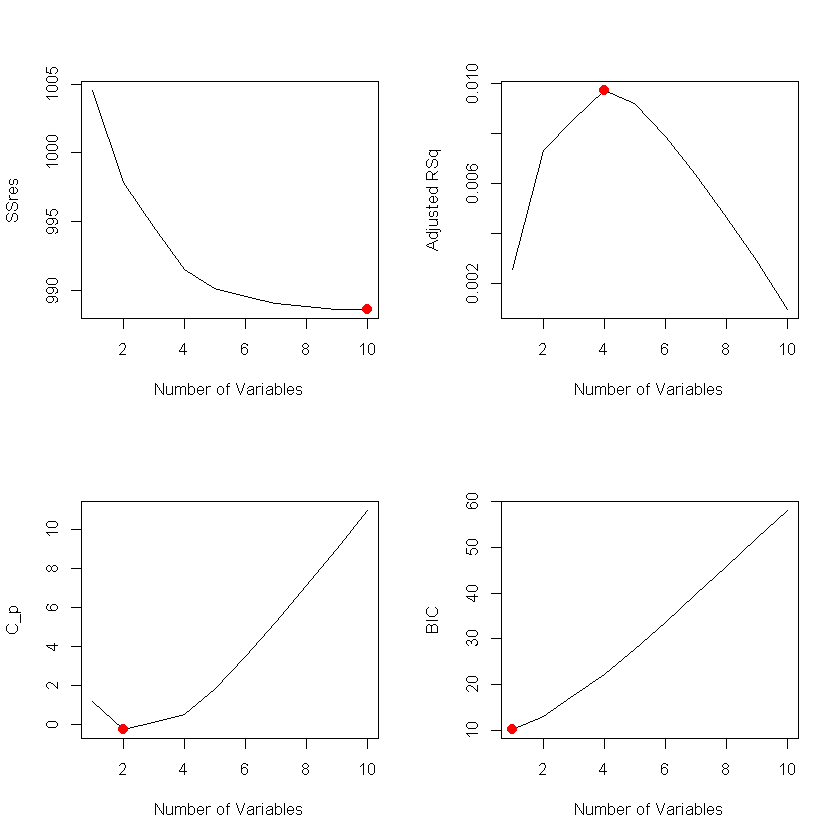

In [29]:
par(mfrow=c(2,2)) 

plot(bss_summ$rss, xlab="Number of Variables", ylab="SSres", type="l") 
K0=which.min(bss_summ$rss) 
points(K0, bss_summ$rss[K0], col="red",cex=2,pch=20)

plot(bss_summ$adjr2,xlab="Number of Variables", ylab="Adjusted RSq", type="l") 
K1=which.max(bss_summ$adjr2) 
points(K1, bss_summ$adjr2[K1], col="red",cex=2,pch=20)

plot(bss_summ$cp,xlab="Number of Variables", ylab="C_p", type="l")
K2=which.min(bss_summ$cp) 
points(K2, bss_summ$cp[K2], col="red",cex=2,pch=20)

plot(bss_summ$bic,xlab="Number of Variables", ylab="BIC", type="l") 
K3=which.min(bss_summ$bic) 
points(K3, bss_summ$bic[K3], col="red",cex=2,pch=20)

In [ ]:
library(MASS)
library(leaps)
bss_penalty = regsubsets(area~.-X-Y, data, nvmax=10, met)
bss_summ=summary(bss_penalty)
bss_summ
par(mfrow=c(2,2)) 

plot(bss_summ$rss, xlab="Number of Variables", ylab="SSres", type="l") 
K0=which.min(bss_summ$rss) 
points(K0, bss_summ$rss[K0], col="red",cex=2,pch=20)

plot(bss_summ$adjr2,xlab="Number of Variables", ylab="Adjusted RSq", type="l") 
K1=which.max(bss_summ$adjr2) 
points(K1, bss_summ$adjr2[K1], col="red",cex=2,pch=20)

plot(bss_summ$cp,xlab="Number of Variables", ylab="C_p", type="l")
K2=which.min(bss_summ$cp) 
points(K2, bss_summ$cp[K2], col="red",cex=2,pch=20)

plot(bss_summ$bic,xlab="Number of Variables", ylab="BIC", type="l") 
K3=which.min(bss_summ$bic) 
points(K3, bss_summ$bic[K3], col="red",cex=2,pch=20)

Suprisingly, all of the criteria **do not seem to agree as to which model is the best regarding their corresponding indicator, with regards to the number of explanatory variables used in it**.

Firstly, the $SS_{res}$, as expected, decreases monotonically as the number of variables increases, due to how it is defined by the method of Least Squares.

The Adjusted R-Squared criterion, which penalizes complexity if it does not decrease SSres "significantly", suggests that the best model is the one with the 4 parameters of DMC, ISI, RH and Wind. 

Using the Mallow’s $C_p$ method, we conclude that the ideal model uses only 2 variables (Wind and DC). However, it is worth mentioning that the models with 3 and 4 parameters maintain a low Mallow's $C_p$ indicator too.

Lastly, the BIC suggests the simplest model (with just 1 variable) as the penalty term is much larger for this criterion, so it favours models with "lower" perplexity.

We can also visualize these results in a more clear way by comparing the model scores for each criterion, using shaded contour plots.

In [ ]:
par(mfrow=c(1,3))
plot(bss_penalty, scale = "Cp")
title("Cp")
plot(bss_penalty, scale = "adjr2")
title("AdjR2")
plot(bss_penalty, scale = "bic")
title("BIC")

We proceed with the Cross-Validation Method for choosing the "best" model. The Cross-Validation method uses "different portions of the data" to estimate the performance of the model on some "new" independent data.

Unfortunately, to use this method, we have to make calculations of the form: $\mathbf{X}_{Μ_p^{-k}}\hat{\beta}_{Μ_p^{-k}}$, where the matrix $\mathbf{X}_{Μ_p^{-k}}$ has as columns the ones that correspond to the $p$ parameters that are included in the model ${Μ_p^{-k}}$ that was fitted/trained using the data from the set $\mathcal{T}\smallsetminus\mathcal{T}_k$, where $\mathcal{T}$ is our "full" training set that was "folded" to the partition $\mathcal{T}_1,\dots,\mathcal{T}_\mathcal{K}$, and as rows those that correspond to the validation set $\mathcal{T}_k$ from our original training data set. This calculation is used to calculate the cross-validation error of the model $Μ_p^{-k}$ using as validation set the one that was exlcluded from our complete training set; $\mathcal{T}_k$.

As such, we create a function that takes as input the the "best" models (from the corresponding training/validation set) of each **size** (as this function will be executed in each _inner_ for-loop - see below), that were generated from the Best Subset selection method, alongsize the data that will be used to validate the model.

In [ ]:
predict.regsubsets=function(model, validation_set, num_par,...){ 
  form=as.formula(model$call[[2]])
  design_matrix=model.matrix(form, validation_set)
  beta_M =coef(model, id=num_par)
  xvars=names(beta_M)
  X_M = design_matrix[,xvars]
  X_M%*%beta_M
}

In [ ]:
K=10  # number of "folds"
q=10 # number of explanatory variables
set.seed(4) # setting a seed number for consistent outputs
partition = sample(1:K, nrow(data), replace=TRUE)
table(partition)

We "folded" our training set into a partition of 10 roughly equal in size subsets, using a random sample from the discrete uniform distribution. We validate this statement by noting all 10 sets have "roughly" 52 members.

In [ ]:
cv_errors_matrix = matrix(
    NA, K, q, dimnames=list(paste("Model with validation set T_",1:K), 
                            paste(1:q," variables model")))

We create the matrix that will have in its $(k,p)$ spot, the number (mean squared prediction error):

\begin{equation}
\hat{Err}_{VS;\mathcal{T}_k}(Μ_p^{-k})=\frac{1}{|\mathcal{T}_k|}\sum_{(x_i,y_i)\in\mathcal{T}_k}(y_i-\hat{f}_{Μ_p^{-k}}(x_i))^2
\end{equation}

In [ ]:
for(k in 1:K){
  bss_cv_train=regsubsets(area~.-X-Y,data=data[partition!=k,],nvmax=10)
  for(p in 1:q){
    cv_validate=predict(model=bss_cv_train, validation_set=data[partition==k,],num_par=p) 
    cv_errors_matrix[k,p]=mean((data$area[partition==k]-cv_validate)^2)
  }
}
cv_errors_matrix

We now take the mean error of all the models of each size - which means taking the mean of the matrix above with regards to its columns, to find which "best" models (essentialy the number of variables; $\bar{p}$) had the lowest mean error.

In [ ]:
mean_cv_errors = apply(cv_errors_matrix, MARGIN=2, FUN=mean)
as.matrix(mean_cv_errors)

In [ ]:
p.cv=which.min(mean_cv_errors)
plot(mean_cv_errors,type='b')
points(p.cv, mean_cv_errors[p.cv], col="red",cex=2,pch=20)

This tells us that the model that the Best Subset selection algorithm gives us, using **ALL** of our data to "train" our model, with just 3 explanatory variables, is the "best" one according to the C-V method. This is the model that includes the explanatory variables of DC, RH and wind. It is important to mention also that the models with 2 and just 1 variable also have mean errors close to that of models with 3 variables, while the ones with 4 and more variables increase immensely in mean error, which means that the C-V method favours non-perplexing models.

Also, changing the seed number from 4 to something else, we see that we always get either $\bar{p}=2 \ or \ 3$

**So C-V agrees with either Mallow's $C_p$ or with none of the criteria that penalize perplexity.**

In [ ]:
bss_cv=regsubsets(area~.-X-Y,data,nvmax=10)
summary(bss_cv)

In [ ]:
coef(bss_cv,3)

With all of the above we can now use all of these "best" models to make predictions for example of the mean burnt area using confidence intervals, if now at the time of writing this: 21/11/2021 16:28, there was a fire at Montesinho park (where we ignore **where** it *may* happen in the park due to how we analyzed our data). We gathered data from https://weawow.com/c9561135, where we have: $wind=7.2km/h$, $RH=57$, $month=0$ and because the site does not provide data for DC and DMC we take a rather low value for DC because we see that the park had quite some rain in the last 10 days and for DMC we take the mean of DMC values that we have in our dataset from the "cold-month" group as a rough indicator. These yield the following intervals:

In [ ]:
best_model_bic= lm(area~DMC,data)
best_model_cp= lm(area~DC+wind,data)
best_model_cv=lm(area~DC+RH+wind,data)
best_model_r2adj= lm(area~DMC+ISI+RH+wind,data)
bic = data.frame(DMC=mean(data[which(data$month==0),]$DMC))
cp = data.frame(DC=80, wind=7.2)
cv = data.frame(DC=80, RH=57, wind=7.2)
r2adj = data.frame(DMC=mean(data[which(data$month==0),]$DMC), 
                   ISI=mean(data[which(data$month==0),]$ISI),
                   RH=57, wind=7.2)
predict(best_model_bic, newdata=bic,interval='conf')
predict(best_model_cp,cp,interval='conf')
predict(best_model_cv,cv,interval='conf')
predict(best_model_r2adj,r2adj,interval='conf')
# We see that these intervals are indeed rather "narrow" 
# due to the fact that the corresponding
# determinant of each model's X^T*X matrix is quite large.

And lastly, so we do fell that we did not use all of the data provided to us, we create a heatmap that indicates where the more destructive fires happened in the park. We see a rather uniform distribution of the fires, so we do not feel awkward that we "ignored" the spatial coordinates while making our data analysis above.

**Code used to create the heat map:**
```{r}
data<-read.csv("forestfires.csv")
library(ggplot2)

coord2<-data[,c(1,2,13)]
coord2$area<-log(coord2$area+1)
coord2$Y<-10-coord2$Y

ggplot(coord2, aes(x = X, y = Y, fill = area)) +
  geom_tile() +
  scale_fill_gradient(low = "yellow", high = "red")
```

![](heat_map.png)

---

## Modelling the significant conflagrations

In all of the above sections, the common culprit in our explanations for some of the troubling observations was the abundance of zeroes in our datasets. Even if the fires recorded were not actually of "zero hectares" in area, they were still put down as 0, which negates their information that they could provide in the model. This means, that having different values of the fire weather observations like temperature, wind or relative humidity but all of them pointing to zero area, kills any information or correlation that these could attribute to the dependent variable.

These "zero area" fires, if **NOT** ignored bring in extraneous factors that are NOT explained by our data. This is because a deciding factor in the area of the fire, is also to the speed of reaction of the firefighters, not just the fire weather indeces of our dataset. If firefighters were not responsive enough, to maintain the fire to be one that would be put down as having "zero area" (<0.36ha), then the variables that we have in our model, start to affect the fire to a severe degree, which is exactly what we want (to the expense of burning Montesinho's forests), as these will help us understand their effect on the dependent variable. 

Also, we still have enough "non zero area" fires to make statistical inferences - 270 observations to be exact.

In [ ]:
data_no_zeroes<-read.csv("forestfiresdata.csv")
names(data_no_zeroes)[1]<-"X" # Due to poor encoding from .xlsx to .csv,
                    # there needs to be a slight renaming of
                    # the first variable.
data_no_zeroes=data_no_zeroes[which(data_no_zeroes$area!=0),]
data_no_zeroes$area=log(data_no_zeroes$area+1)
data_no_zeroes[which(data_no_zeroes$month!=6&data_no_zeroes$month!=7&data_no_zeroes$month!=8&data_no_zeroes$month!=9),]$month=0
data_no_zeroes[which(data_no_zeroes$month!=0),]$month=1

fit_no_zeroes = lm(area~.-X-Y, data=data_no_zeroes)
summary(fit_no_zeroes)

e = fit_no_zeroes$residuals
sigma=summary(fit_no_zeroes)$sigma
# The diagonal of the Hat/Influence matrix
h = hatvalues(fit_no_zeroes)
e_studentized = e/(sigma*sqrt(1-h))
qqnorm(e_studentized)
qqline(e_studentized)
grid()
res=fit_no_zeroes$residuals
plot(fit_no_zeroes$fitted,res,xlab="Fitted values", ylab="Residuals",
    main="Residuals vs Fitted Values")
abline(h=0)

In [ ]:
bss_penalty = regsubsets(area~.-X-Y, data_no_zeroes, nvmax=10)
bss_summ=summary(bss_penalty)
bss_summ

par(mfrow=c(2,2)) 

plot(bss_summ$rss, xlab="Number of Variables", ylab="SSres", type="l") 
K0=which.min(bss_summ$rss) 
points(K0, bss_summ$rss[K0], col="red",cex=2,pch=20)

plot(bss_summ$adjr2,xlab="Number of Variables", ylab="Adjusted RSq", type="l") 
K1=which.max(bss_summ$adjr2) 
points(K1, bss_summ$adjr2[K1], col="red",cex=2,pch=20)

plot(bss_summ$cp,xlab="Number of Variables", ylab="C_p", type="l")
K2=which.min(bss_summ$cp) 
points(K2, bss_summ$cp[K2], col="red",cex=2,pch=20)

plot(bss_summ$bic,xlab="Number of Variables", ylab="BIC", type="l") 
K3=which.min(bss_summ$bic) 
points(K3, bss_summ$bic[K3], col="red",cex=2,pch=20)

In [ ]:
K=10  # number of "folds"
q=10 # number of explanatory variables
set.seed(4) # setting a seed number for consistent outputs
partition = sample(1:K, nrow(data_no_zeroes), replace=TRUE)
table(partition)
cv_errors_matrix = matrix(
    NA, K, q, dimnames=list(paste("Model with validation set T_",1:K), 
                            paste(1:q," variables model")))
for(k in 1:K){
  bss_cv_train=regsubsets(area~.-X-Y,data=data_no_zeroes[partition!=k,],nvmax=10)
  for(p in 1:q){
    cv_validate=predict(model=bss_cv_train, validation_set=data_no_zeroes[partition==k,],num_par=p) 
    cv_errors_matrix[k,p]=mean((data_no_zeroes$area[partition==k]-cv_validate)^2)
  }
}
cv_errors_matrix
mean_cv_errors = apply(cv_errors_matrix, MARGIN=2, FUN=mean)
as.matrix(mean_cv_errors)
p.cv=which.min(mean_cv_errors)
plot(mean_cv_errors,type='b')
points(p.cv, mean_cv_errors[p.cv], col="red",cex=2,pch=20)
bss_cv=regsubsets(area~.-X-Y,data_no_zeroes,nvmax=10)
summary(bss_cv)

We see that there was quite an improvement in our output by just taking the "troublesome" zeroes out of the equation. We see the errors do not longer seem to be correlated and that it is more obvious now that the error term is normally distributed, even if the number of the observations was essentially halved. There is still a disagreement though, between the mdoel selection algorithms.

So while we see that our data can be "altered" in a clever way to help us model the effects of fire weather observations and fuel moisture codes on the dependent variable, there is still a long way to go to truly utilize this dataset to its fullest extent. But unfortunately this demands a lot more time for investigation...

___
## Bibliography/Citations:
---
* Canada, N. R. (n.d.). Canadian wildland fire information system: Canadian forest fire weather index (FWI) system. Canadian Wildland Fire Information System | Canadian Forest Fire Weather Index (FWI) System. Retrieved November 25, 2021, from https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi. 


* Fire Weather Index (FWI) System. (n.d.). Retrieved from https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system


* Masinda, M.M., Sun, L., Wang, G. et al. Moisture content thresholds for ignition and rate of fire spread for various dead fuels in northeast forest ecosystems of China. J. For. Res. 32, 1147–1155 (2021). https://doi.org/10.1007/s11676-020-01162-2


* Carmine Maffei, Massimo Menenti, Predicting forest fires burned area and rate of spread from pre-fire multispectral satellite measurements, ISPRS Journal of Photogrammetry and Remote Sensing, Volume 158, 2019, Pages 263-278, ISSN 0924-2716, https://doi.org/10.1016/j.isprsjprs.2019.10.013.